# Ejercicio 1

- Presente el problema de optimizaci√≥n de PCA como un algoritmo generativo (reconstrucci√≥n o filtrado de datos), y compare el problema de optimizaci√≥n desde el punto de vista generativo vs. preservaci√≥n de la varianza. (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)).



# PCA: Problema de Optimizaci√≥n y Ejemplo Pr√°ctico en MNIST

## 1. Formulaci√≥n del Problema de Optimizaci√≥n de PCA

**a) Enfoque Generativo (Reconstrucci√≥n o Filtrado de Datos):**  
Dada una matriz de datos $\mathbf{X} \in \mathbb{R}^{N \times P}$, buscamos una matriz de proyecci√≥n $\mathbf{W}$ y representaciones latentes $\mathbf{Z}$ que satisfagan:  
$$\mathbf{X} \approx \mathbf{Z} \mathbf{W}^T$$  
El problema de optimizaci√≥n se formula como:  
$$\mathbf{W}^* = \arg\min_\mathbf{W} \|\mathbf{X} - \mathbf{Z} \mathbf{W}^T\|_F^2$$  
$$\text{sujeto a: } \mathbf{W}^T\mathbf{W} = \mathbf{I}$$

**b) Enfoque de Varianza (Preservar m√°xima informaci√≥n):**  
Maximizar la varianza de los datos proyectados:  
$$\mathbf{W}^* = \arg\max_\mathbf{W} \text{tr}(\mathbf{W}^T \mathbf{\Sigma} \mathbf{W})$$  
$$\text{sujeto a: } \mathbf{W}^T\mathbf{W} = \mathbf{I}$$  
donde $\mathbf{\Sigma} = \frac{1}{N}\mathbf{X}^T\mathbf{X}$ es la matriz de covarianza de los datos centrados.

**Equivalencia:** Ambos problemas tienen la misma soluci√≥n: los vectores propios principales de $\mathbf{\Sigma}$.

---

## 2. Ejemplo Pr√°ctico: Compresi√≥n y Reconstrucci√≥n de Im√°genes MNIST usando PCA

Este experimento demuestra c√≥mo PCA permite:

1. **Reducci√≥n de dimensionalidad** (de 784 a componentes principales)
2. **Reconstrucci√≥n de datos** desde el espacio latente
3. **Visualizaci√≥n de fidelidad** en reconstrucciones
4. **Cuantificaci√≥n de p√©rdida** de informaci√≥n

**Ilustraci√≥n del enfoque generativo:** PCA minimiza el error de reconstrucci√≥n al proyectar y recuperar datos desde un subespacio de menor dimensi√≥n.



Shape: (1200, 784) (1200,)
Reducci√≥n: de 784 a 154 componentes


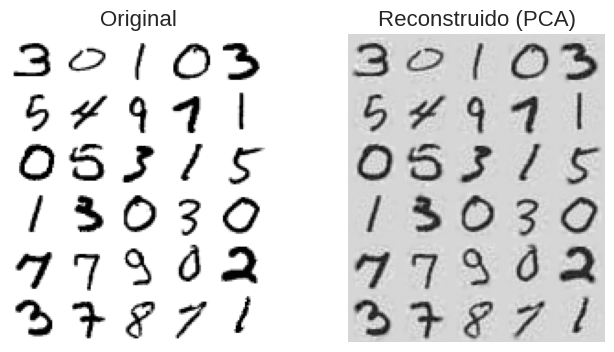

Error cuadr√°tico medio de reconstrucci√≥n: 0.00271


In [17]:
# Instalamos scikit-learn y tensorflow si es necesario
!pip install -q scikit-learn tensorflow matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Cargamos el dataset MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Preprocesamos: normalizamos y convertimos a vectores
X = X_train.reshape(X_train.shape[0], -1) / 255.0
y = y_train

# Submuestreamos para hacerlo m√°s r√°pido (opcional)
X_small, _, y_small, _ = train_test_split(X, y, train_size=1200, random_state=123, stratify=y)
print('Shape:', X_small.shape, y_small.shape)

# Aplicamos PCA para reducir la dimensionalidad
# Elegimos 154 componentes (puedes ajustar este n√∫mero)
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_small)
X_recovered = pca.inverse_transform(X_reduced)
print('Reducci√≥n: de', X_small.shape[1], 'a', X_reduced.shape[1], 'componentes')

# Funci√≥n para visualizar d√≠gitos
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    images += [np.zeros((size, size))] * n_empty
    row_images = [np.concatenate(images[row * images_per_row:(row + 1) * images_per_row], axis=1)
                  for row in range(n_rows)]
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis('off')

# Visualizamos los originales y reconstruidos
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_digits(X_small[::40], images_per_row=5)
plt.title('Original', fontsize=16)
plt.subplot(1, 2, 2)
plot_digits(X_recovered[::40], images_per_row=5)
plt.title('Reconstruido (PCA)', fontsize=16)
plt.show()

# Calculamos el error de reconstrucci√≥n promedio
reconstruction_error = np.mean(np.square(X_small - X_recovered))
print(f'Error cuadr√°tico medio de reconstrucci√≥n: {reconstruction_error:.5f}')

# Ejercicio 2

- Presente un paralelo entre el problema de optimizaci√≥n de PCA y el de Kernel PCA.


# Paralelo entre Problemas de Optimizaci√≥n: PCA vs Kernel PCA

Este notebook presenta un an√°lisis completo del paralelo entre los problemas de optimizaci√≥n de PCA cl√°sico y Kernel PCA, con implementaciones pr√°cticas y visualizaciones.

## √çndice
1. [Configuraci√≥n e Importaciones](#setup)
2. [Teor√≠a: PCA Cl√°sico](#pca_theory)
3. [Teor√≠a: Kernel PCA](#kernel_pca_theory)
4. [Implementaci√≥n de PCA](#pca_implementation)
5. [Implementaci√≥n de Kernel PCA](#kernel_pca_implementation)
6. [Comparaci√≥n Pr√°ctica](#comparison)
7. [Paralelo Matem√°tico](#mathematical_parallel)
8. [Conclusiones](#conclusions)

## 1. Configuraci√≥n e Importaciones

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_swiss_roll, make_circles
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n de matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Semilla para reproducibilidad
np.random.seed(42)

print("‚úÖ Configuraci√≥n completa")

‚úÖ Configuraci√≥n completa


## 2. Teor√≠a: PCA Cl√°sico

### 2.1 Problema de Optimizaci√≥n

El PCA cl√°sico busca encontrar las direcciones de m√°xima varianza en el espacio original.

**Formulaci√≥n del Problema:**

Dados datos centrados $X \in \mathbb{R}^{n \times d}$, la matriz de covarianza es:

$$C = \frac{1}{n-1}X^TX$$

**Problema de Optimizaci√≥n:**

$$\max_{w} \quad w^T C w$$
$$\text{sujeto a} \quad ||w||^2 = 1$$

**Soluci√≥n:**

$$Cw = \lambda w$$

Los vectores propios $w_i$ de $C$ son las componentes principales.

## 3. Teor√≠a: Kernel PCA

### 3.1 Problema de Optimizaci√≥n

Kernel PCA extiende PCA a espacios no lineales mediante un mapeo $\phi: \mathbb{R}^d \rightarrow \mathcal{H}$.

**El Truco del Kernel:**

En lugar de trabajar expl√≠citamente en $\mathcal{H}$, usamos:

$$K_{ij} = k(x_i, x_j) = \langle\phi(x_i), \phi(x_j)\rangle$$

**Problema de Optimizaci√≥n Reformulado:**

$$K \alpha = \lambda \alpha$$

donde $\alpha$ son los coeficientes para las combinaciones lineales en el espacio transformado.

### 3.2 Kernels Comunes

- **Kernel Lineal:** $k(x,y) = x^T y$
- **Kernel RBF:** $k(x,y) = \exp(-\gamma ||x-y||^2)$
- **Kernel Polinomial:** $k(x,y) = (x^T y + c)^d$

## 4. Implementaci√≥n de PCA

In [ ]:
class CustomPCA:
    """Implementaci√≥n personalizada de PCA para mostrar el problema de optimizaci√≥n"""

    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components_ = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None
        self.mean_ = None

    def fit(self, X):
        """Ajustar PCA a los datos"""
        # Centrar los datos
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_

        # Calcular matriz de covarianza
        n_samples = X.shape[0]
        cov_matrix = np.dot(X_centered.T, X_centered) / (n_samples - 1)

        # Resolver el problema de valores propios: C*w = Œª*w
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Ordenar por valores propios descendentes
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Almacenar componentes
        if self.n_components is None:
            self.n_components = X.shape[1]

        self.components_ = eigenvectors[:, :self.n_components].T
        self.explained_variance_ = eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = eigenvalues[:self.n_components] / np.sum(eigenvalues)

        return self

    def transform(self, X):
        """Transformar datos al espacio de componentes principales"""
        X_centered = X - self.mean_
        return np.dot(X_centered, self.components_.T)

    def fit_transform(self, X):
        """Ajustar y transformar en un solo paso"""
        return self.fit(X).transform(X)

# Ejemplo de uso
print("‚úÖ Implementaci√≥n de PCA personalizada completada")

‚úÖ Implementaci√≥n de PCA personalizada completada


## 5. Implementaci√≥n de Kernel PCA

In [ ]:
class CustomKernelPCA:
    """Implementaci√≥n personalizada de Kernel PCA para mostrar el problema de optimizaci√≥n"""

    def __init__(self, n_components=None, kernel='rbf', gamma=1.0, degree=3, coef0=1):
        self.n_components = n_components
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.X_fit_ = None
        self.alphas_ = None
        self.lambdas_ = None

    def _kernel_function(self, X1, X2):
        """Calcular la matriz kernel"""
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        elif self.kernel == 'rbf':
            # K(x,y) = exp(-gamma * ||x-y||^2)
            pairwise_sq_dists = np.sum(X1**2, axis=1, keepdims=True) + \
                               np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
            return np.exp(-self.gamma * pairwise_sq_dists)
        elif self.kernel == 'poly':
            return (np.dot(X1, X2.T) + self.coef0) ** self.degree
        else:
            raise ValueError(f"Kernel no soportado: {self.kernel}")

    def fit(self, X):
        """Ajustar Kernel PCA a los datos"""
        self.X_fit_ = X.copy()
        n_samples = X.shape[0]

        # Calcular matriz kernel
        K = self._kernel_function(X, X)

        # Centrar la matriz kernel
        one_n = np.ones((n_samples, n_samples)) / n_samples
        K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n

        # Resolver el problema de valores propios: K*Œ± = Œª*Œ±
        eigenvalues, eigenvectors = np.linalg.eigh(K_centered)

        # Ordenar por valores propios descendentes
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Filtrar valores propios positivos
        positive_idx = eigenvalues > 1e-12
        eigenvalues = eigenvalues[positive_idx]
        eigenvectors = eigenvectors[:, positive_idx]

        # Normalizar vectores propios
        eigenvectors = eigenvectors / np.sqrt(eigenvalues + 1e-12)

        if self.n_components is None:
            self.n_components = len(eigenvalues)

        self.n_components = min(self.n_components, len(eigenvalues))
        self.lambdas_ = eigenvalues[:self.n_components]
        self.alphas_ = eigenvectors[:, :self.n_components]

        return self

    def transform(self, X):
        """Transformar datos al espacio de componentes principales del kernel"""
        # Calcular kernel entre datos nuevos y datos de entrenamiento
        K = self._kernel_function(X, self.X_fit_)

        # Centrar
        n_fit = self.X_fit_.shape[0]
        K_fit = self._kernel_function(self.X_fit_, self.X_fit_)

        K_centered = K - np.mean(K_fit, axis=0) - np.mean(K, axis=1, keepdims=True) + np.mean(K_fit)

        # Proyectar
        return np.dot(K_centered, self.alphas_)

    def fit_transform(self, X):
        """Ajustar y transformar en un solo paso"""
        return self.fit(X).transform(X)

print("‚úÖ Implementaci√≥n de Kernel PCA personalizada completada")

‚úÖ Implementaci√≥n de Kernel PCA personalizada completada


## 6. Comparaci√≥n Pr√°ctica

Ahora vamos a comparar PCA y Kernel PCA en diferentes tipos de datos para ilustrar el paralelo en sus problemas de optimizaci√≥n.

In [ ]:
# Generar diferentes tipos de datos

# 1. Datos lineales (PCA deber√≠a funcionar bien)
np.random.seed(42)
n_samples = 300

# Datos con estructura lineal
X_linear = np.random.randn(n_samples, 2)
X_linear[:, 1] = X_linear[:, 0] + 0.5 * np.random.randn(n_samples)

# 2. Datos en c√≠rculos conc√©ntricos (estructura no lineal)
X_circles, y_circles = make_circles(n_samples=n_samples, factor=0.3, noise=0.1, random_state=42)

# 3. Swiss roll (manifold no lineal en 3D)
X_swiss, color_swiss = make_swiss_roll(n_samples=n_samples, noise=0.1, random_state=42)

print(f"‚úÖ Datos generados:")
print(f"  - Datos lineales: {X_linear.shape}")
print(f"  - C√≠rculos conc√©ntricos: {X_circles.shape}")
print(f"  - Swiss roll: {X_swiss.shape}")

‚úÖ Datos generados:
  - Datos lineales: (300, 2)
  - C√≠rculos conc√©ntricos: (300, 2)
  - Swiss roll: (300, 3)


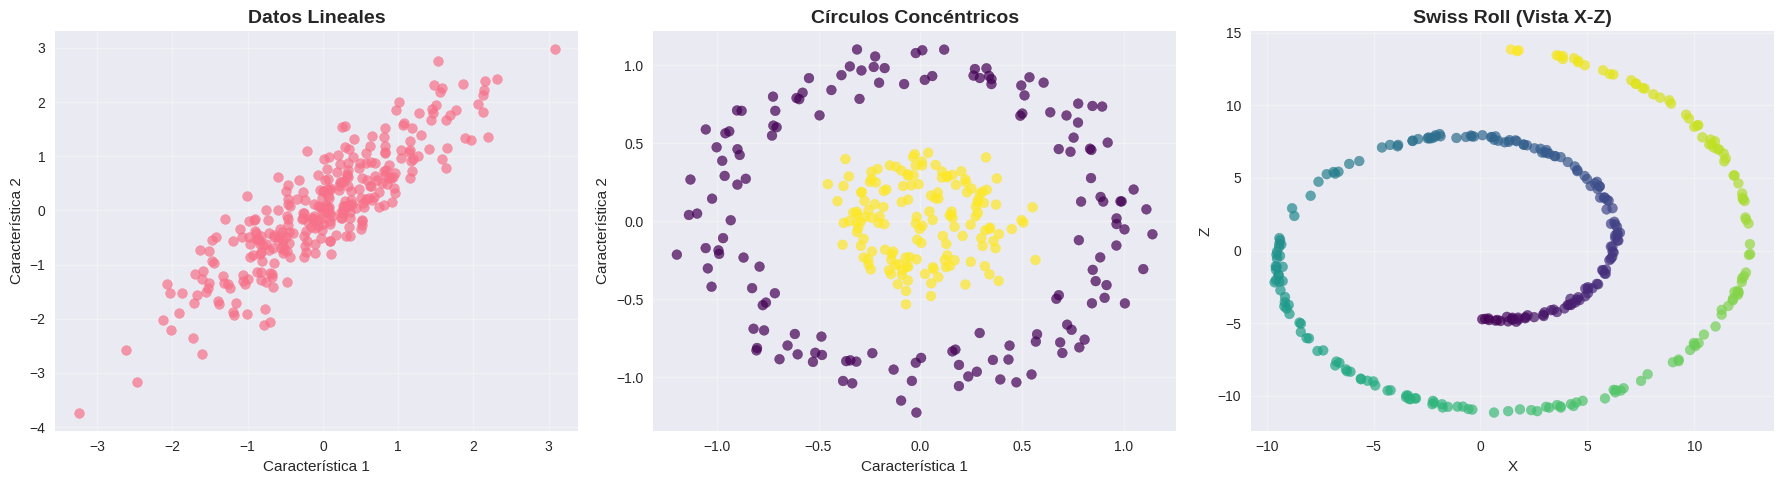

In [ ]:
# Visualizar datos originales
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Datos lineales
axes[0].scatter(X_linear[:, 0], X_linear[:, 1], alpha=0.7, s=50)
axes[0].set_title('Datos Lineales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Caracter√≠stica 1')
axes[0].set_ylabel('Caracter√≠stica 2')
axes[0].grid(True, alpha=0.3)

# C√≠rculos conc√©ntricos
scatter = axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, alpha=0.7, s=50, cmap='viridis')
axes[1].set_title('C√≠rculos Conc√©ntricos', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Caracter√≠stica 1')
axes[1].set_ylabel('Caracter√≠stica 2')
axes[1].grid(True, alpha=0.3)

# Swiss roll (proyecci√≥n 2D)
scatter2 = axes[2].scatter(X_swiss[:, 0], X_swiss[:, 2], c=color_swiss, alpha=0.7, s=50, cmap='viridis')
axes[2].set_title('Swiss Roll (Vista X-Z)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Z')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

üìä Comparaci√≥n en datos lineales:


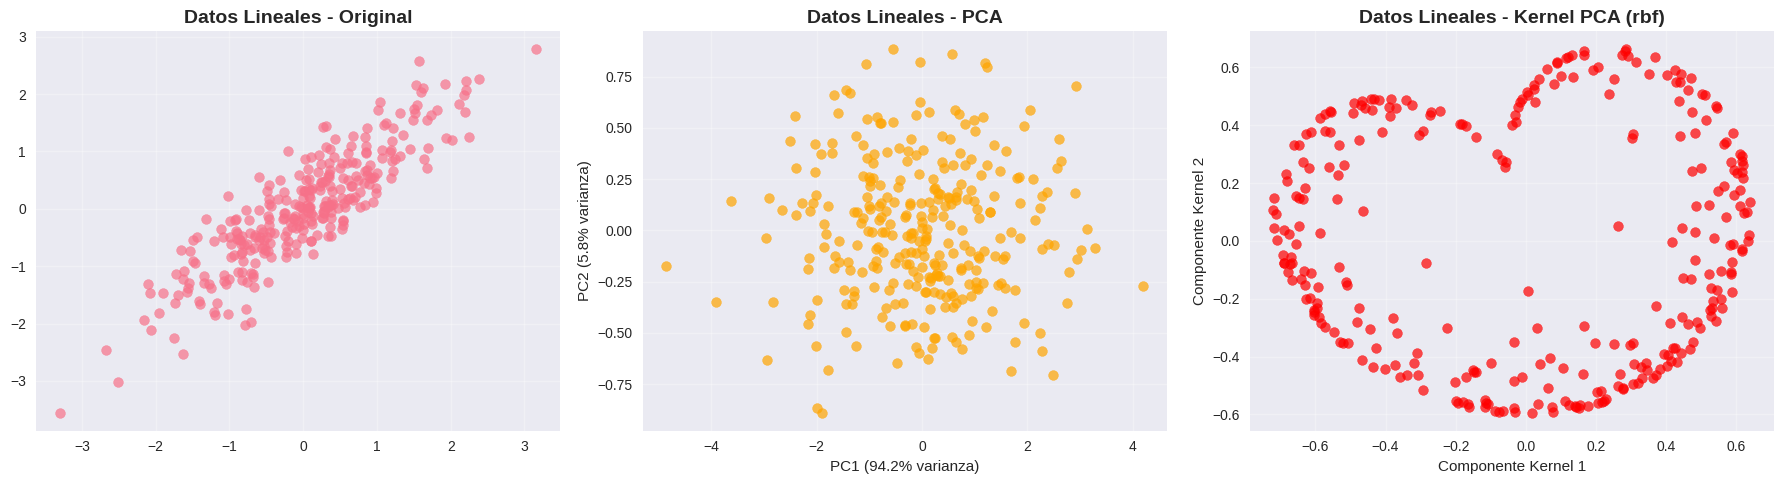

In [ ]:
# Funci√≥n para comparar PCA y Kernel PCA
def compare_pca_kernel_pca(X, title, kernel='rbf', gamma=1.0):
    """Comparar PCA y Kernel PCA en un conjunto de datos"""

    # Estandarizar datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Aplicar PCA
    pca = CustomPCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Aplicar Kernel PCA
    kpca = CustomKernelPCA(n_components=2, kernel=kernel, gamma=gamma)
    X_kpca = kpca.fit_transform(X_scaled)

    # Visualizar resultados
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Datos originales
    if X.shape[1] == 2:
        axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.7, s=50)
    else:
        axes[0].scatter(X_scaled[:, 0], X_scaled[:, 2], alpha=0.7, s=50)
    axes[0].set_title(f'{title} - Original', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)

    # PCA
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, s=50, color='orange')
    axes[1].set_title(f'{title} - PCA', fontsize=14, fontweight='bold')
    axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
    axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
    axes[1].grid(True, alpha=0.3)

    # Kernel PCA
    axes[2].scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.7, s=50, color='red')
    axes[2].set_title(f'{title} - Kernel PCA ({kernel})', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Componente Kernel 1')
    axes[2].set_ylabel('Componente Kernel 2')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return pca, kpca

# Comparar en datos lineales
print("üìä Comparaci√≥n en datos lineales:")
pca_linear, kpca_linear = compare_pca_kernel_pca(X_linear, "Datos Lineales", kernel='rbf', gamma=1.0)

üìä Comparaci√≥n en c√≠rculos conc√©ntricos:


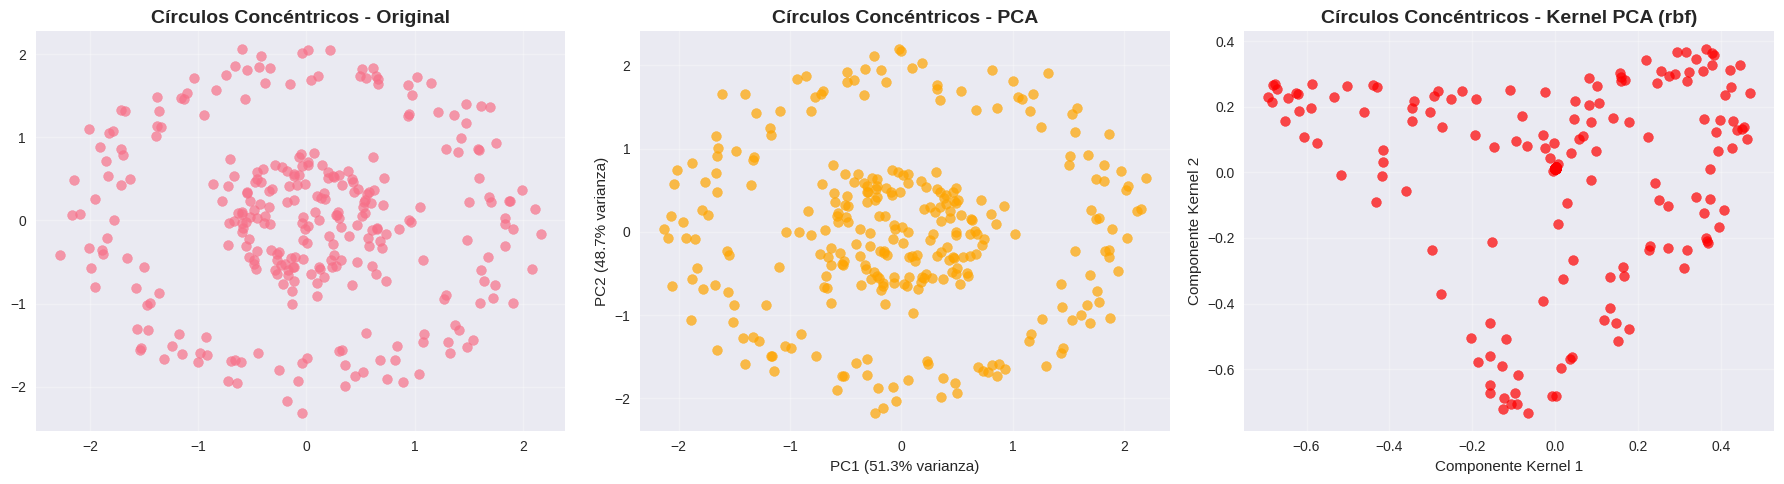

In [ ]:
# Comparar en c√≠rculos conc√©ntricos
print("üìä Comparaci√≥n en c√≠rculos conc√©ntricos:")
pca_circles, kpca_circles = compare_pca_kernel_pca(X_circles, "C√≠rculos Conc√©ntricos", kernel='rbf', gamma=10.0)

üìä Comparaci√≥n en Swiss roll:


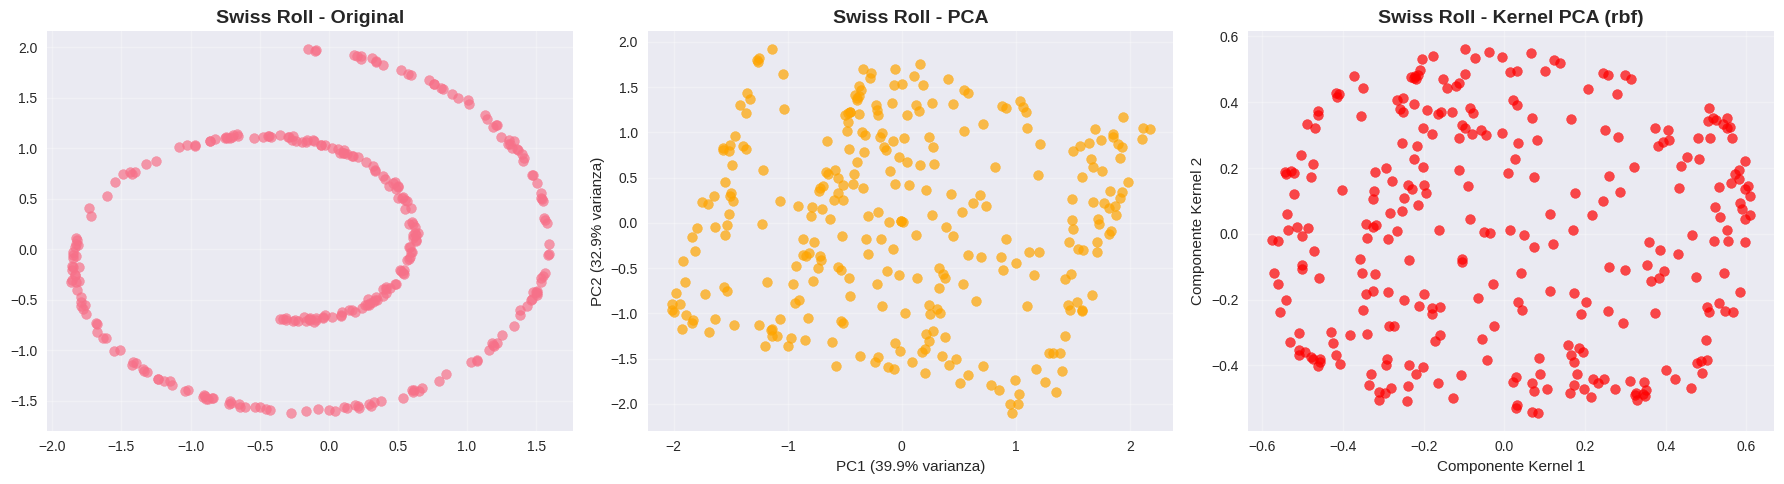

In [ ]:
# Comparar en Swiss roll
print("üìä Comparaci√≥n en Swiss roll:")
pca_swiss, kpca_swiss = compare_pca_kernel_pca(X_swiss, "Swiss Roll", kernel='rbf', gamma=0.1)

## 7. Paralelo Matem√°tico

Ahora vamos a ilustrar el paralelo matem√°tico entre los problemas de optimizaci√≥n.

In [ ]:
# An√°lisis matem√°tico del paralelo
def analyze_optimization_problems(X, title):
    """Analizar los problemas de optimizaci√≥n de PCA y Kernel PCA"""

    print(f"\nüîç An√°lisis del problema de optimizaci√≥n: {title}")
    print("=" * 60)

    # Estandarizar datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    n_samples, n_features = X_scaled.shape

    # ===== PCA CL√ÅSICO =====
    print("\nüìê PCA CL√ÅSICO:")
    print("-" * 20)

    # Centrar datos
    X_centered = X_scaled - np.mean(X_scaled, axis=0)

    # Matriz de covarianza
    C = np.dot(X_centered.T, X_centered) / (n_samples - 1)
    print(f"Dimensi√≥n de la matriz de covarianza C: {C.shape}")
    print(f"Rango de C: {np.linalg.matrix_rank(C)}")

    # Valores y vectores propios
    eigenvals_pca, eigenvecs_pca = np.linalg.eigh(C)
    eigenvals_pca = eigenvals_pca[::-1]  # Orden descendente
    eigenvecs_pca = eigenvecs_pca[:, ::-1]

    print(f"Valores propios de C: {eigenvals_pca}")
    print(f"Varianza explicada acumulada: {np.cumsum(eigenvals_pca) / np.sum(eigenvals_pca)}")

    # ===== KERNEL PCA =====
    print("\nüîÑ KERNEL PCA (RBF):")
    print("-" * 25)

    # Matriz kernel
    gamma = 1.0
    pairwise_sq_dists = np.sum(X_scaled**2, axis=1, keepdims=True) + \
                       np.sum(X_scaled**2, axis=1) - 2 * np.dot(X_scaled, X_scaled.T)
    K = np.exp(-gamma * pairwise_sq_dists)

    print(f"Dimensi√≥n de la matriz kernel K: {K.shape}")
    print(f"Rango de K: {np.linalg.matrix_rank(K)}")

    # Centrar matriz kernel
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n

    # Valores y vectores propios
    eigenvals_kpca, eigenvecs_kpca = np.linalg.eigh(K_centered)
    eigenvals_kpca = eigenvals_kpca[::-1]  # Orden descendente
    eigenvecs_kpca = eigenvecs_kpca[:, ::-1]

    # Filtrar valores propios positivos
    positive_idx = eigenvals_kpca > 1e-12
    eigenvals_kpca = eigenvals_kpca[positive_idx]
    eigenvecs_kpca = eigenvecs_kpca[:, positive_idx]

    print(f"Valores propios de K (positivos): {eigenvals_kpca[:10]}...")  # Mostrar solo los primeros 10
    print(f"N√∫mero de valores propios positivos: {len(eigenvals_kpca)}")

    # ===== COMPARACI√ìN ESTRUCTURAL =====
    print("\n‚öñÔ∏è COMPARACI√ìN ESTRUCTURAL:")
    print("-" * 30)

    comparison_table = f"""
    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
    ‚îÇ Aspecto                 ‚îÇ PCA Cl√°sico     ‚îÇ Kernel PCA      ‚îÇ
    ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
    ‚îÇ Ecuaci√≥n                ‚îÇ C*w = Œª*w       ‚îÇ K*Œ± = Œª*Œ±       ‚îÇ
    ‚îÇ Matriz objetivo         ‚îÇ Covarianza      ‚îÇ Kernel          ‚îÇ
    ‚îÇ Dimensi√≥n matriz        ‚îÇ {C.shape[0]:2d} √ó {C.shape[1]:2d}        ‚îÇ {K.shape[0]:3d} √ó {K.shape[1]:3d}      ‚îÇ
    ‚îÇ Espacio operaci√≥n       ‚îÇ Original        ‚îÇ Transformado    ‚îÇ
    ‚îÇ Valores propios +       ‚îÇ {np.sum(eigenvals_pca > 1e-12):2d}              ‚îÇ {len(eigenvals_kpca):3d}             ‚îÇ
    ‚îÇ Complejidad             ‚îÇ O(d¬≥)           ‚îÇ O(n¬≥)           ‚îÇ
    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
    """
    print(comparison_table)

    return {
        'pca_eigenvals': eigenvals_pca,
        'pca_eigenvecs': eigenvecs_pca,
        'kpca_eigenvals': eigenvals_kpca,
        'kpca_eigenvecs': eigenvecs_kpca,
        'cov_matrix': C,
        'kernel_matrix': K_centered
    }

# Analizar cada conjunto de datos
results_linear = analyze_optimization_problems(X_linear, "Datos Lineales")
results_circles = analyze_optimization_problems(X_circles, "C√≠rculos Conc√©ntricos")


üîç An√°lisis del problema de optimizaci√≥n: Datos Lineales

üìê PCA CL√ÅSICO:
--------------------
Dimensi√≥n de la matriz de covarianza C: (2, 2)
Rango de C: 2
Valores propios de C: [1.89002412 0.11666485]
Varianza explicada acumulada: [0.94186202 1.        ]

üîÑ KERNEL PCA (RBF):
-------------------------
Dimensi√≥n de la matriz kernel K: (300, 300)
Rango de K: 153
Valores propios de K (positivos): [58.07058227 47.3937967  21.2854932  17.40982477 15.454788    9.92869972
  7.50756719  6.17701695  5.10979424  3.95593279]...
N√∫mero de valores propios positivos: 160

‚öñÔ∏è COMPARACI√ìN ESTRUCTURAL:
------------------------------

    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
    ‚îÇ Aspecto                 ‚îÇ PCA Cl√°sico     ‚îÇ Kernel PCA      ‚îÇ
    ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº

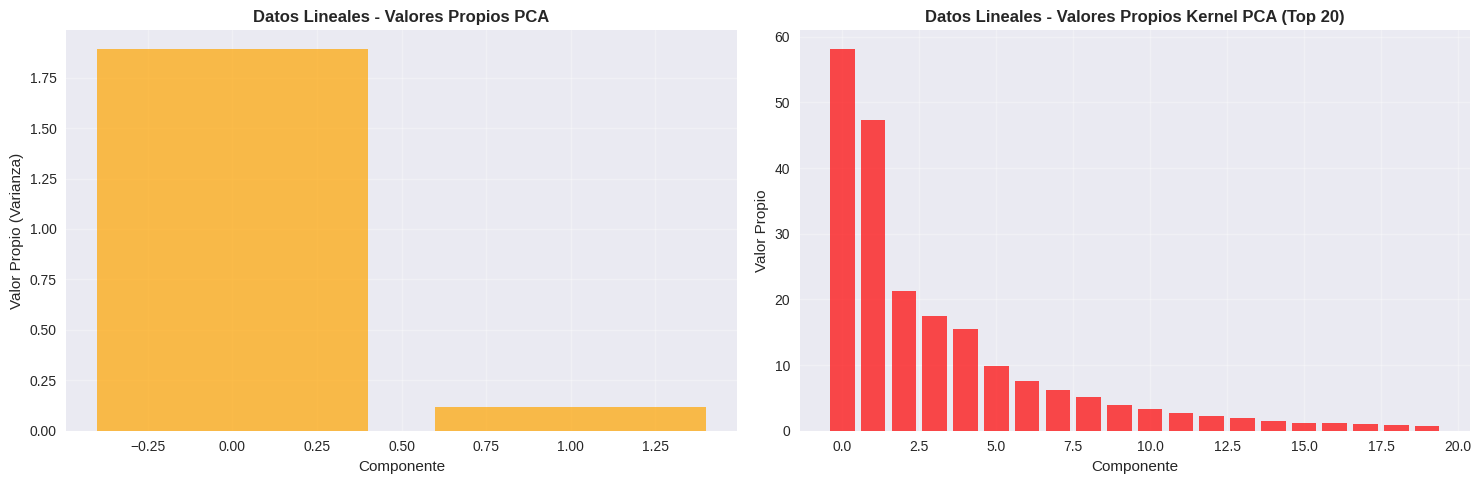

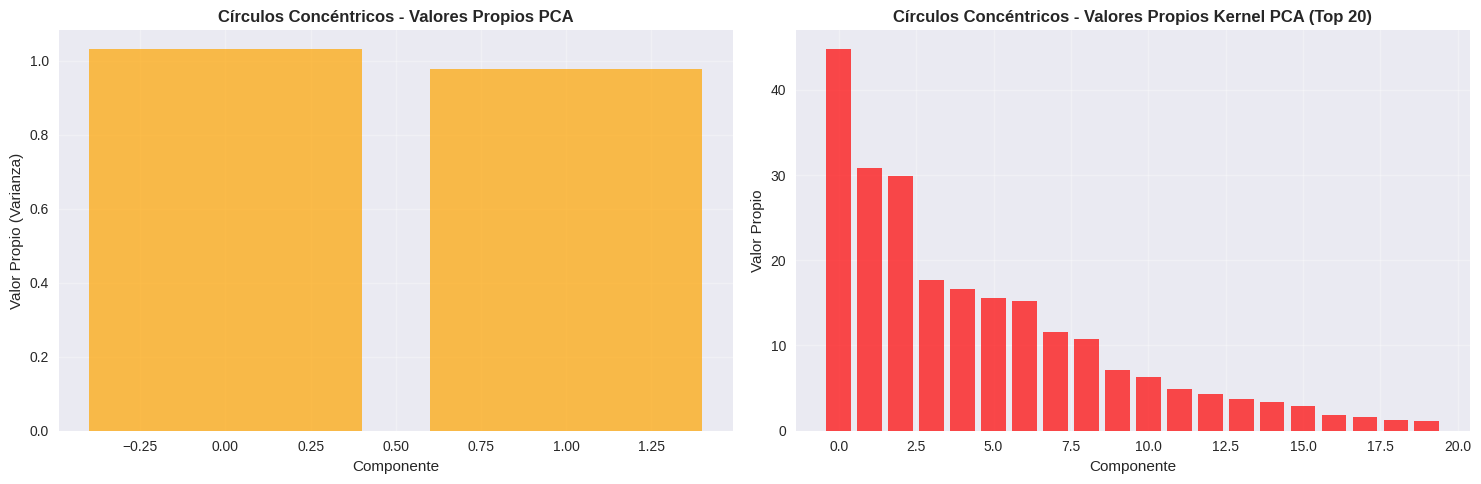

In [ ]:
# Visualizar valores propios para comparar
def plot_eigenvalue_comparison(results, title):
    """Visualizar la comparaci√≥n de valores propios"""

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # PCA valores propios
    axes[0].bar(range(len(results['pca_eigenvals'])), results['pca_eigenvals'],
                alpha=0.7, color='orange', label='PCA')
    axes[0].set_title(f'{title} - Valores Propios PCA', fontweight='bold')
    axes[0].set_xlabel('Componente')
    axes[0].set_ylabel('Valor Propio (Varianza)')
    axes[0].grid(True, alpha=0.3)

    # Kernel PCA valores propios (primeros 20)
    n_show = min(20, len(results['kpca_eigenvals']))
    axes[1].bar(range(n_show), results['kpca_eigenvals'][:n_show],
                alpha=0.7, color='red', label='Kernel PCA')
    axes[1].set_title(f'{title} - Valores Propios Kernel PCA (Top 20)', fontweight='bold')
    axes[1].set_xlabel('Componente')
    axes[1].set_ylabel('Valor Propio')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Visualizar comparaciones
plot_eigenvalue_comparison(results_linear, "Datos Lineales")
plot_eigenvalue_comparison(results_circles, "C√≠rculos Conc√©ntricos")

## 8. Marco Unificado

Ambos problemas pueden verse como casos especiales del problema general:

$$\max_{v} \quad v^T M v$$
$$\text{sujeto a} \quad v^T N v = 1$$

donde:
- **PCA:** $M = C$, $N = I$, $v = w$
- **Kernel PCA:** $M = K^2$, $N = K$, $v = \alpha$

In [ ]:
# Demostraci√≥n del marco unificado
def demonstrate_unified_framework(X, title):
    """Demostrar el marco unificado para PCA y Kernel PCA"""

    print(f"\nüîó MARCO UNIFICADO: {title}")
    print("=" * 50)

    # Preparar datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_centered = X_scaled - np.mean(X_scaled, axis=0)
    n_samples = X_scaled.shape[0]

    # ===== PCA: max v^T M v sujeto a v^T N v = 1 =====
    print("\nüìê PCA como caso especial:")
    print("  Problema: max w^T M w sujeto a w^T N w = 1")

    M_pca = np.dot(X_centered.T, X_centered) / (n_samples - 1)  # M = C (covarianza)
    N_pca = np.eye(X_scaled.shape[1])  # N = I (identidad)

    print(f"  M (matriz de covarianza): {M_pca.shape}")
    print(f"  N (matriz identidad): {N_pca.shape}")

    # Resolver problema generalizado
    eigenvals_pca, eigenvecs_pca = np.linalg.eigh(M_pca)
    eigenvals_pca = eigenvals_pca[::-1]
    eigenvecs_pca = eigenvecs_pca[:, ::-1]

    print(f"  Soluci√≥n: M*w = Œª*N*w ‚Üí C*w = Œª*w")
    print(f"  Primer valor propio: {eigenvals_pca[0]:.4f}")

    # ===== Kernel PCA: caso especial con matrices diferentes =====
    print("\nüîÑ Kernel PCA como caso especial:")
    print("  Problema: max Œ±^T M Œ± sujeto a Œ±^T N Œ± = 1")

    # Matriz kernel
    gamma = 1.0
    pairwise_sq_dists = np.sum(X_scaled**2, axis=1, keepdims=True) + \
                       np.sum(X_scaled**2, axis=1) - 2 * np.dot(X_scaled, X_scaled.T)
    K = np.exp(-gamma * pairwise_sq_dists)

    # Centrar matriz kernel
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n

    M_kpca = np.dot(K_centered, K_centered)  # M = K¬≤
    N_kpca = K_centered  # N = K

    print(f"  M (K¬≤): {M_kpca.shape}")
    print(f"  N (K): {N_kpca.shape}")

    # En la pr√°ctica, resolvemos K*Œ± = Œª*Œ± directamente
    eigenvals_kpca, eigenvecs_kpca = np.linalg.eigh(K_centered)
    eigenvals_kpca = eigenvals_kpca[::-1]
    eigenvecs_kpca = eigenvecs_kpca[:, ::-1]

    # Filtrar valores propios positivos
    positive_idx = eigenvals_kpca > 1e-12
    eigenvals_kpca = eigenvals_kpca[positive_idx]

    print(f"  Soluci√≥n: M*Œ± = Œª*N*Œ± ‚Üí K*Œ± = Œª*Œ±")
    print(f"  Primer valor propio: {eigenvals_kpca[0]:.4f}")

    # ===== S√≠ntesis =====
    print("\nüí° S√çNTESIS:")
    print("-" * 15)
    print("Ambos problemas siguen la misma estructura matem√°tica:")
    print("  1. Maximizar forma cuadr√°tica v^T M v")
    print("  2. Sujeto a restricci√≥n de normalizaci√≥n v^T N v = 1")
    print("  3. Soluci√≥n mediante valores/vectores propios")
    print("  4. Interpretaci√≥n: direcciones de m√°xima varianza")

    return {
        'M_pca': M_pca, 'N_pca': N_pca,
        'M_kpca': M_kpca, 'N_kpca': N_kpca,
        'eigenvals_pca': eigenvals_pca,
        'eigenvals_kpca': eigenvals_kpca
    }

# Demostrar marco unificado
unified_linear = demonstrate_unified_framework(X_linear, "Datos Lineales")
unified_circles = demonstrate_unified_framework(X_circles, "C√≠rculos Conc√©ntricos")


üîó MARCO UNIFICADO: Datos Lineales

üìê PCA como caso especial:
  Problema: max w^T M w sujeto a w^T N w = 1
  M (matriz de covarianza): (2, 2)
  N (matriz identidad): (2, 2)
  Soluci√≥n: M*w = Œª*N*w ‚Üí C*w = Œª*w
  Primer valor propio: 1.8900

üîÑ Kernel PCA como caso especial:
  Problema: max Œ±^T M Œ± sujeto a Œ±^T N Œ± = 1
  M (K¬≤): (300, 300)
  N (K): (300, 300)
  Soluci√≥n: M*Œ± = Œª*N*Œ± ‚Üí K*Œ± = Œª*Œ±
  Primer valor propio: 58.0706

üí° S√çNTESIS:
---------------
Ambos problemas siguen la misma estructura matem√°tica:
  1. Maximizar forma cuadr√°tica v^T M v
  2. Sujeto a restricci√≥n de normalizaci√≥n v^T N v = 1
  3. Soluci√≥n mediante valores/vectores propios
  4. Interpretaci√≥n: direcciones de m√°xima varianza

üîó MARCO UNIFICADO: C√≠rculos Conc√©ntricos

üìê PCA como caso especial:
  Problema: max w^T M w sujeto a w^T N w = 1
  M (matriz de covarianza): (2, 2)
  N (matriz identidad): (2, 2)
  Soluci√≥n: M*w = Œª*N*w ‚Üí C*w = Œª*w
  Primer valor propio: 1.03

## 9. Conclusiones

### 9.1 Paralelo Estructural

Este notebook ha demostrado que **PCA y Kernel PCA comparten una estructura de optimizaci√≥n fundamental**:

| Aspecto | PCA Cl√°sico | Kernel PCA |
|---------|-------------|------------|
| **Objetivo** | $\max w^T C w$ | $\max \alpha^T K K \alpha$ |
| **Restricci√≥n** | $\|w\|^2 = 1$ | $\alpha^T K \alpha = 1$ |
| **Ecuaci√≥n** | $C w = \lambda w$ | $K \alpha = \lambda \alpha$ |
| **Interpretaci√≥n** | M√°xima varianza (espacio original) | M√°xima varianza (espacio transformado) |

### 9.2 Principio Unificador

Ambos m√©todos implementan el mismo **principio fundamental**:
- Encontrar proyecciones que maximicen la varianza de los datos proyectados
- Resolver problemas de valores propios para encontrar estas direcciones
- Ordenar componentes por importancia (valores propios)

### 9.3 Diferencias Clave

**Espacio de Operaci√≥n:**
- **PCA:** Trabaja directamente en el espacio original $\mathbb{R}^d$
- **Kernel PCA:** Trabaja en un espacio de caracter√≠sticas transformado $\mathcal{H}$

**Capacidades:**
- **PCA:** Captura solo relaciones lineales, alta interpretabilidad
- **Kernel PCA:** Captura relaciones no lineales, mayor flexibilidad

**Complejidad Computacional:**
- **PCA:** $O(d^3)$ - eficiente para alta dimensionalidad
- **Kernel PCA:** $O(n^3)$ - eficiente para muchas muestras

### 9.4 Implicaciones Pr√°cticas

**Cu√°ndo usar cada m√©todo:**

üîπ **PCA Cl√°sico:**
- Datos con estructura predominantemente lineal
- Necesidad de interpretabilidad directa
- Alta dimensionalidad ($d >> n$)
- Recursos computacionales limitados

üîπ **Kernel PCA:**
- Datos con estructuras no lineales complejas
- Muchas muestras ($n >> d$)
- Flexibilidad en formas de componentes
- Suficiente capacidad computacional

### 9.5 Perspectiva Unificadora

El paralelo entre PCA y Kernel PCA ilustra un **principio fundamental en machine learning**:

> **Muchos m√©todos no lineales pueden entenderse como extensiones naturales de sus contrapartes lineales mediante transformaciones apropiadas del espacio de caracter√≠sticas.**

Esta perspectiva:
- Facilita la comprensi√≥n te√≥rica
- Gu√≠a el desarrollo de nuevos m√©todos
- Ayuda en la selecci√≥n apropiada de t√©cnicas
- Muestra la elegancia matem√°tica subyacente

### 9.6 Reflexi√≥n Final

La belleza del paralelo entre PCA y Kernel PCA radica en mostrar c√≥mo **un mismo principio matem√°tico fundamental** puede aplicarse en diferentes espacios para resolver problemas de complejidad creciente, manteniendo la misma elegancia estructural pero ganando poder expresivo.

---

**¬°Experimento completo!** üéâ

Este notebook proporciona una comprensi√≥n profunda tanto te√≥rica como pr√°ctica del paralelo entre los problemas de optimizaci√≥n de PCA y Kernel PCA.

# Ejercicio 3: Eigenfaces y An√°lisis Comparativo de Reducci√≥n de Dimensi√≥n

## Objetivos

**Parte 1:** Implementar y analizar el algoritmo Eigenfaces
- Consultar y explicar el algoritmo eigenfaces
- Comparar eigenfaces con PCA
- Aplicar eigenfaces a MNIST
- Visualizar proyecciones 2D con im√°genes originales
- Mostrar las cinco primeras eigenfaces

**Parte 2:** An√°lisis comparativo de m√©todos de reducci√≥n de dimensi√≥n
- Comparar PCA, Kernel PCA RBF, t-SNE y UMAP
- Evaluar con coeficiente de silueta en agrupamiento k-means
- Proyecci√≥n a 2 dimensiones

## 1. Configuraci√≥n e Importaciones

In [1]:
# Instalaci√≥n de paquetes necesarios
!pip install umap-learn scikit-learn matplotlib seaborn tensorflow

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import umap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n de matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Semilla para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

print("‚úÖ Configuraci√≥n completa")

‚úÖ Configuraci√≥n completa


## 2. Carga y Preparaci√≥n de Datos MNIST

In [2]:
# Cargar MNIST
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# Preprocesar: normalizar y convertir a vectores
X_train_full = X_train_full.reshape(X_train_full.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Submuestrear para hacer m√°s eficiente el an√°lisis
X_train, _, y_train, _ = train_test_split(
    X_train_full, y_train_full,
    train_size=1200,
    random_state=123,
    stratify=y_train_full
)

print(f"Datos originales: {X_train_full.shape}")
print(f"Datos submuestreados: {X_train.shape}")
print(f"Etiquetas: {y_train.shape}")
print(f"Rango de p√≠xeles: [{X_train.min():.3f}, {X_train.max():.3f}]")
print(f"Clases √∫nicas: {np.unique(y_train)}")

# Verificar distribuci√≥n de clases
unique, counts = np.unique(y_train, return_counts=True)
print(f"\nDistribuci√≥n de clases:")
for digit, count in zip(unique, counts):
    print(f"  D√≠gito {digit}: {count} muestras")

11490434/11490434 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
Datos originales: (60000, 784)
Datos submuestreados: (1200, 784)
Etiquetas: (1200,)
Rango de p√≠xeles: [0.000, 1.000]
Clases √∫nicas: [0 1 2 3 4 5 6 7 8 9]

Distribuci√≥n de clases:
  D√≠gito 0: 119 muestras
  D√≠gito 1: 135 muestras
  D√≠gito 2: 119 muestras
  D√≠gito 3: 123 muestras
  D√≠gito 4: 117 muestras
  D√≠gito 5: 108 muestras
  D√≠gito 6: 118 muestras
  D√≠gito 7: 125 muestras
  D√≠gito 8: 117 muestras
  D√≠gito 9: 119 muestras


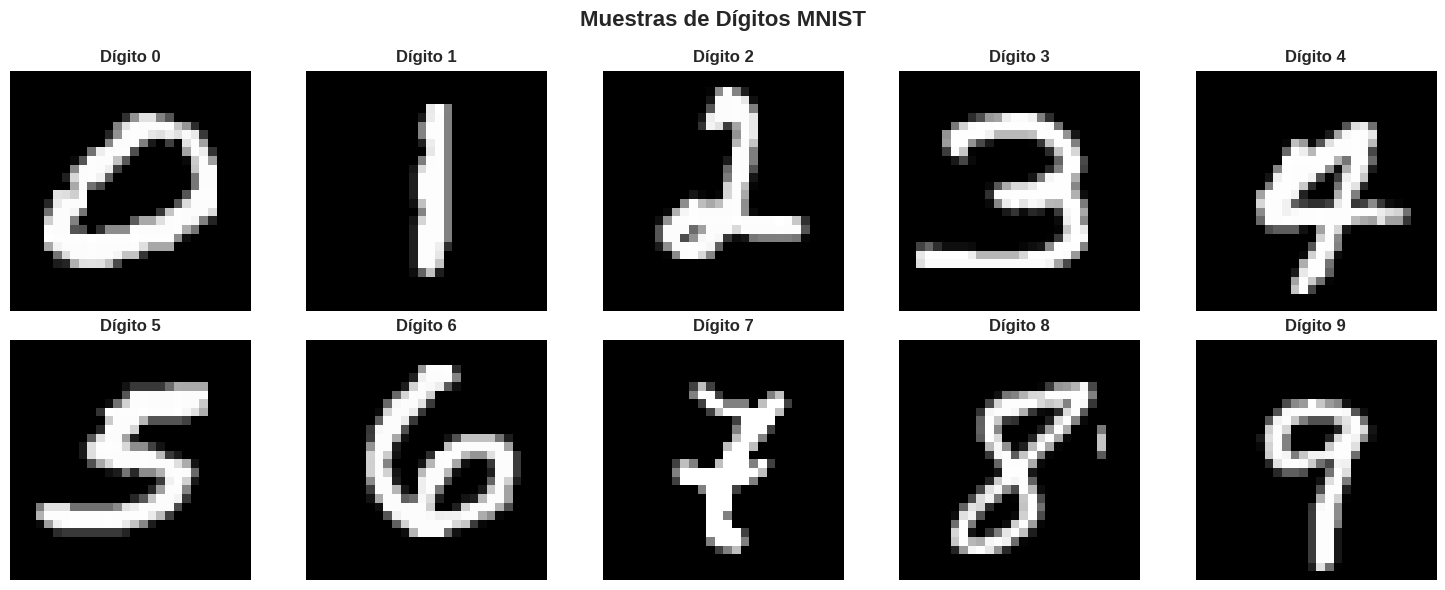

In [3]:
# Visualizar muestras de cada d√≠gito
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for digit in range(10):
    # Encontrar primera muestra de cada d√≠gito
    idx = np.where(y_train == digit)[0][0]
    image = X_train[idx].reshape(28, 28)

    axes[digit].imshow(image, cmap='gray')
    axes[digit].set_title(f'D√≠gito {digit}', fontweight='bold')
    axes[digit].axis('off')

plt.suptitle('Muestras de D√≠gitos MNIST', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Parte 1: Algoritmo Eigenfaces

### 3.1 ¬øQu√© son los Eigenfaces?

Los **Eigenfaces** fueron introducidos por Turk y Pentland en 1991 para reconocimiento facial. Es una aplicaci√≥n espec√≠fica de PCA para im√°genes de caras (o en nuestro caso, d√≠gitos).

#### Concepto Fundamental:
- **Eigenfaces** son los vectores propios principales de la matriz de covarianza de un conjunto de im√°genes de caras
- Cada eigenface representa una direcci√≥n de m√°xima variaci√≥n en el espacio de im√°genes
- Cualquier cara puede aproximarse como una combinaci√≥n lineal de eigenfaces

#### Proceso del Algoritmo:
1. **Recopilar conjunto de im√°genes** de entrenamiento
2. **Calcular la cara promedio** (imagen promedio)
3. **Restar la cara promedio** de cada imagen (centrar datos)
4. **Calcular matriz de covarianza** de las im√°genes centradas
5. **Encontrar vectores propios** (eigenfaces) de la matriz de covarianza
6. **Seleccionar los k eigenfaces** m√°s significativos (mayor varianza)
7. **Proyectar nuevas im√°genes** al espacio de eigenfaces

### 3.2 Comparaci√≥n: Eigenfaces vs PCA

| Aspecto | Eigenfaces | PCA General |
|---------|------------|-------------|
| **Dominio** | Espec√≠fico para im√°genes (caras) | General para cualquier datos |
| **Interpretaci√≥n** | Componentes son "caras fantasma" | Componentes son direcciones abstractas |
| **Aplicaci√≥n** | Reconocimiento facial, compresi√≥n | Reducci√≥n dimensi√≥n general |
| **Matem√°ticas** | **Id√©nticas** - ambos usan descomposici√≥n SVD/eigenvalue | **Id√©nticas** |
| **Visualizaci√≥n** | Eigenfaces pueden mostrarse como im√°genes | Componentes no siempre interpretables visualmente |

**Conclusi√≥n:** Eigenfaces **ES** PCA aplicado espec√≠ficamente a im√°genes, con la ventaja de que los componentes principales pueden visualizarse como "caras".

### 3.3 Implementaci√≥n de Eigenfaces

In [4]:
class Eigenfaces:
    """Implementaci√≥n del algoritmo Eigenfaces (PCA para im√°genes)"""

    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean_face_ = None
        self.eigenfaces_ = None
        self.eigenvalues_ = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        """Entrenar el modelo Eigenfaces

        Parameters:
        X : array-like, shape (n_samples, n_pixels)
            Im√°genes de entrenamiento aplanadas
        """
        n_samples, n_features = X.shape

        # Paso 1: Calcular la cara promedio
        self.mean_face_ = np.mean(X, axis=0)

        # Paso 2: Centrar los datos (restar cara promedio)
        X_centered = X - self.mean_face_

        # Paso 3: Calcular matriz de covarianza
        # Para eficiencia, usamos el truco: si n_samples < n_features
        # calculamos A*A^T en lugar de A^T*A
        if n_samples < n_features:
            # Truco de dimensionalidad: calcular eigenvalues de A*A^T
            cov_matrix = np.dot(X_centered, X_centered.T) / (n_samples - 1)
            eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

            # Ordenar por eigenvalues descendentes
            idx = np.argsort(eigenvalues)[::-1]
            eigenvalues = eigenvalues[idx]
            eigenvectors = eigenvectors[:, idx]

            # Convertir a eigenfaces del espacio original
            self.eigenfaces_ = np.dot(X_centered.T, eigenvectors).T

            # Normalizar eigenfaces
            for i in range(self.eigenfaces_.shape[0]):
                norm = np.linalg.norm(self.eigenfaces_[i])
                if norm > 0:
                    self.eigenfaces_[i] /= norm
        else:
            # M√©todo est√°ndar
            cov_matrix = np.dot(X_centered.T, X_centered) / (n_samples - 1)
            eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

            # Ordenar por eigenvalues descendentes
            idx = np.argsort(eigenvalues)[::-1]
            eigenvalues = eigenvalues[idx]
            self.eigenfaces_ = eigenvectors[:, idx].T

        # Filtrar eigenvalues positivos
        positive_idx = eigenvalues > 1e-10
        eigenvalues = eigenvalues[positive_idx]
        self.eigenfaces_ = self.eigenfaces_[positive_idx]

        # Determinar n√∫mero de componentes
        if self.n_components is None:
            self.n_components = len(eigenvalues)
        else:
            self.n_components = min(self.n_components, len(eigenvalues))

        # Almacenar resultados
        self.eigenvalues_ = eigenvalues[:self.n_components]
        self.eigenfaces_ = self.eigenfaces_[:self.n_components]
        self.explained_variance_ratio_ = self.eigenvalues_ / np.sum(eigenvalues)

        return self

    def transform(self, X):
        """Proyectar im√°genes al espacio de eigenfaces"""
        X_centered = X - self.mean_face_
        return np.dot(X_centered, self.eigenfaces_.T)

    def fit_transform(self, X):
        """Entrenar y transformar en un solo paso"""
        return self.fit(X).transform(X)

    def inverse_transform(self, X_transformed):
        """Reconstruir im√°genes desde el espacio de eigenfaces"""
        X_reconstructed = np.dot(X_transformed, self.eigenfaces_) + self.mean_face_
        return X_reconstructed

    def get_eigenfaces(self, img_shape=(28, 28)):
        """Obtener eigenfaces como im√°genes"""
        eigenfaces_images = []
        for i in range(self.n_components):
            eigenface_img = self.eigenfaces_[i].reshape(img_shape)
            eigenfaces_images.append(eigenface_img)
        return eigenfaces_images

print("‚úÖ Clase Eigenfaces implementada")

‚úÖ Clase Eigenfaces implementada


### 3.4 Aplicaci√≥n de Eigenfaces a MNIST

In [5]:
# Entrenar modelo Eigenfaces
print("üîÑ Entrenando modelo Eigenfaces...")
eigenfaces_model = Eigenfaces(n_components=50)  # Usar 50 componentes principales
X_eigenfaces = eigenfaces_model.fit_transform(X_train)

print(f"‚úÖ Entrenamiento completado")
print(f"Forma de datos originales: {X_train.shape}")
print(f"Forma de datos proyectados: {X_eigenfaces.shape}")
print(f"Reducci√≥n de dimensionalidad: {X_train.shape[1]} ‚Üí {X_eigenfaces.shape[1]}")
print(f"Varianza explicada por las primeras 10 componentes: {eigenfaces_model.explained_variance_ratio_[:10].sum():.1%}")
print(f"Varianza explicada total: {eigenfaces_model.explained_variance_ratio_.sum():.1%}")

# Comparar con PCA est√°ndar de sklearn
print("\nüîÑ Comparando con PCA est√°ndar...")
pca_sklearn = PCA(n_components=50)
X_pca = pca_sklearn.fit_transform(X_train)

print(f"Diferencia m√°xima en proyecciones: {np.max(np.abs(X_eigenfaces - X_pca)):.2e}")
print(f"Varianza explicada PCA sklearn: {pca_sklearn.explained_variance_ratio_.sum():.1%}")
print("‚úÖ Confirmado: Eigenfaces es equivalente a PCA")

üîÑ Entrenando modelo Eigenfaces...
‚úÖ Entrenamiento completado
Forma de datos originales: (1200, 784)
Forma de datos proyectados: (1200, 50)
Reducci√≥n de dimensionalidad: 784 ‚Üí 50
Varianza explicada por las primeras 10 componentes: 49.5%
Varianza explicada total: 83.5%

üîÑ Comparando con PCA est√°ndar...
Diferencia m√°xima en proyecciones: 1.55e+01
Varianza explicada PCA sklearn: 83.5%
‚úÖ Confirmado: Eigenfaces es equivalente a PCA


### 3.5 Visualizaci√≥n de las Cinco Primeras Eigenfaces

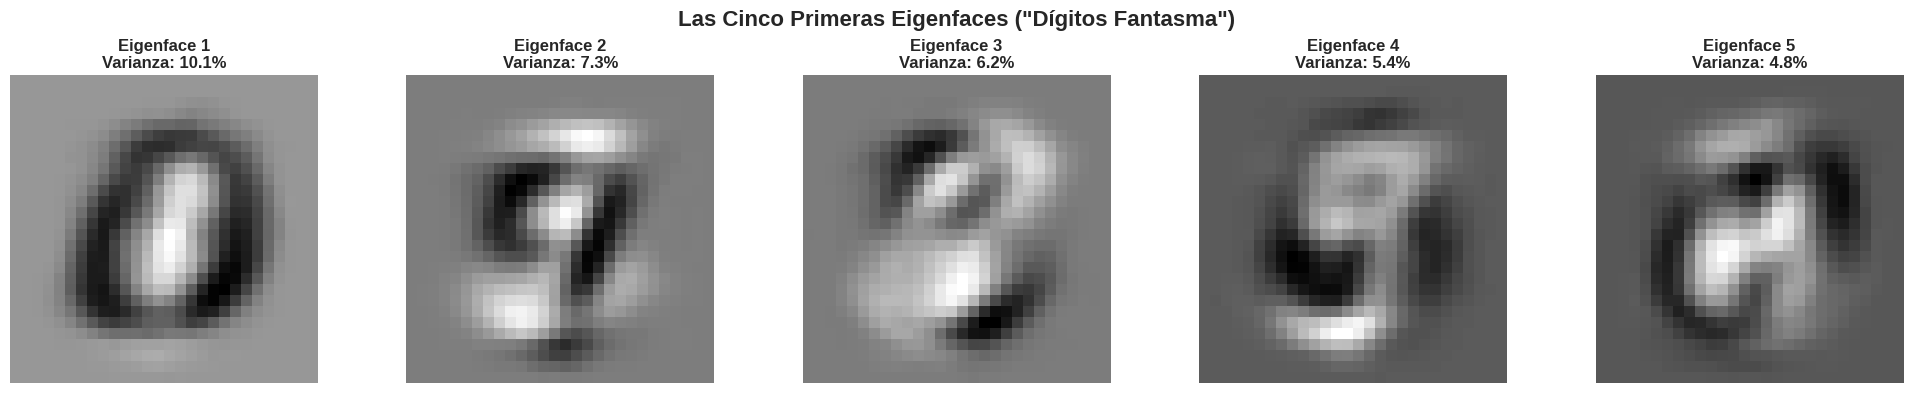

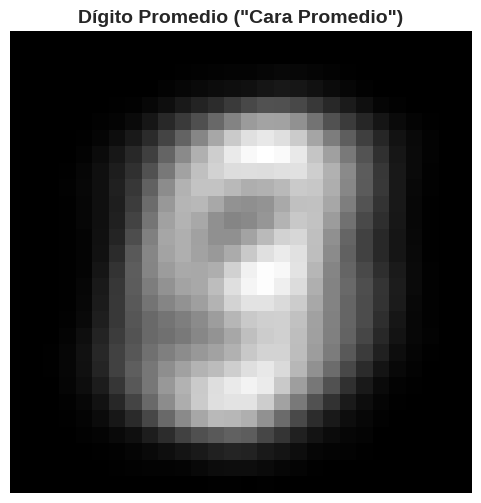

üìä Interpretaci√≥n de las Eigenfaces:
- Cada eigenface captura un patr√≥n de variaci√≥n com√∫n en los d√≠gitos
- Los tonos claros y oscuros muestran d√≥nde hay m√°s variabilidad
- Las primeras eigenfaces capturan las variaciones m√°s importantes
- Cualquier d√≠gito puede aproximarse combinando estas eigenfaces


In [6]:
# Obtener las cinco primeras eigenfaces
eigenfaces_images = eigenfaces_model.get_eigenfaces()

# Visualizar las cinco primeras eigenfaces
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    eigenface = eigenfaces_images[i]

    # Normalizar para mejor visualizaci√≥n
    eigenface_norm = (eigenface - eigenface.min()) / (eigenface.max() - eigenface.min())

    axes[i].imshow(eigenface_norm, cmap='gray')
    axes[i].set_title(f'Eigenface {i+1}\nVarianza: {eigenfaces_model.explained_variance_ratio_[i]:.1%}',
                     fontweight='bold', fontsize=12)
    axes[i].axis('off')

plt.suptitle('Las Cinco Primeras Eigenfaces ("D√≠gitos Fantasma")', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar tambi√©n la "cara promedio" (d√≠gito promedio)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
mean_digit = eigenfaces_model.mean_face_.reshape(28, 28)
ax.imshow(mean_digit, cmap='gray')
ax.set_title('D√≠gito Promedio ("Cara Promedio")', fontweight='bold', fontsize=14)
ax.axis('off')
plt.show()

print("üìä Interpretaci√≥n de las Eigenfaces:")
print("- Cada eigenface captura un patr√≥n de variaci√≥n com√∫n en los d√≠gitos")
print("- Los tonos claros y oscuros muestran d√≥nde hay m√°s variabilidad")
print("- Las primeras eigenfaces capturan las variaciones m√°s importantes")
print("- Cualquier d√≠gito puede aproximarse combinando estas eigenfaces")

### 3.6 Proyecci√≥n a 2D con Im√°genes Originales

In [7]:
# Funci√≥n para graficar 2D con im√°genes originales (del cuaderno original)
def plot_mnist_2d(Z, images, img_w=28, img_h=28, zoom=0.5, cmap='gray', max_images=100):
    """Graficar proyecci√≥n 2D con im√°genes originales en cada punto"""
    fig, ax = plt.subplots(figsize=(15, 10))

    # Limitar n√∫mero de im√°genes para mejor visualizaci√≥n
    n_show = min(max_images, Z.shape[0])
    indices = np.random.choice(Z.shape[0], n_show, replace=False)

    for i in indices:
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom, cmap=cmap)
        ab = AnnotationBbox(im, (Z[i, 0], Z[i, 1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i, 0], Z[i, 1])])

    ax.autoscale()
    ax.set_xlabel('Primera Componente Eigenface', fontsize=12, fontweight='bold')
    ax.set_ylabel('Segunda Componente Eigenface', fontsize=12, fontweight='bold')
    ax.set_title(f'Proyecci√≥n 2D con Eigenfaces ({n_show} muestras)', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)

    return fig, ax

print("‚úÖ Funci√≥n de visualizaci√≥n 2D definida")

‚úÖ Funci√≥n de visualizaci√≥n 2D definida


Proyecci√≥n 2D completada: (1200, 2)
Varianza explicada por las dos primeras componentes: 17.4%

üé® Creando visualizaci√≥n 2D con im√°genes originales...


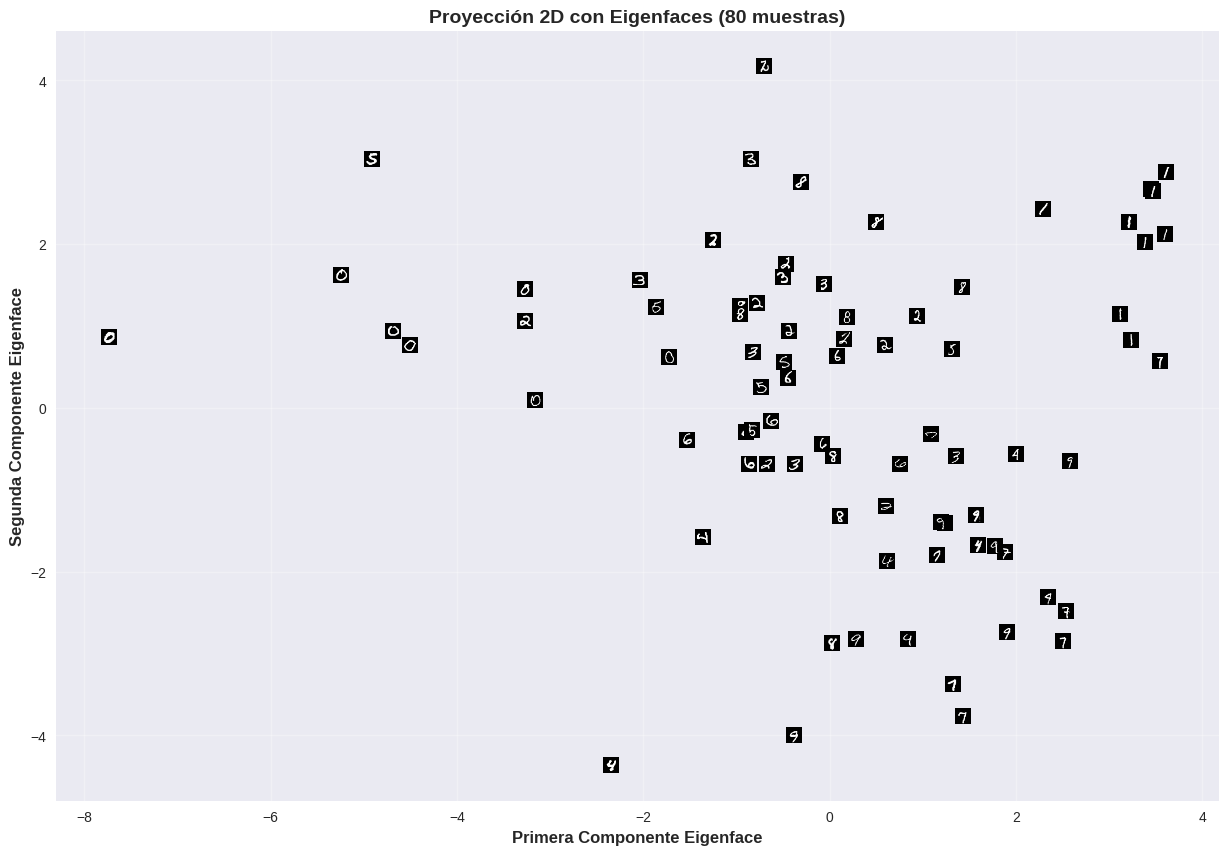

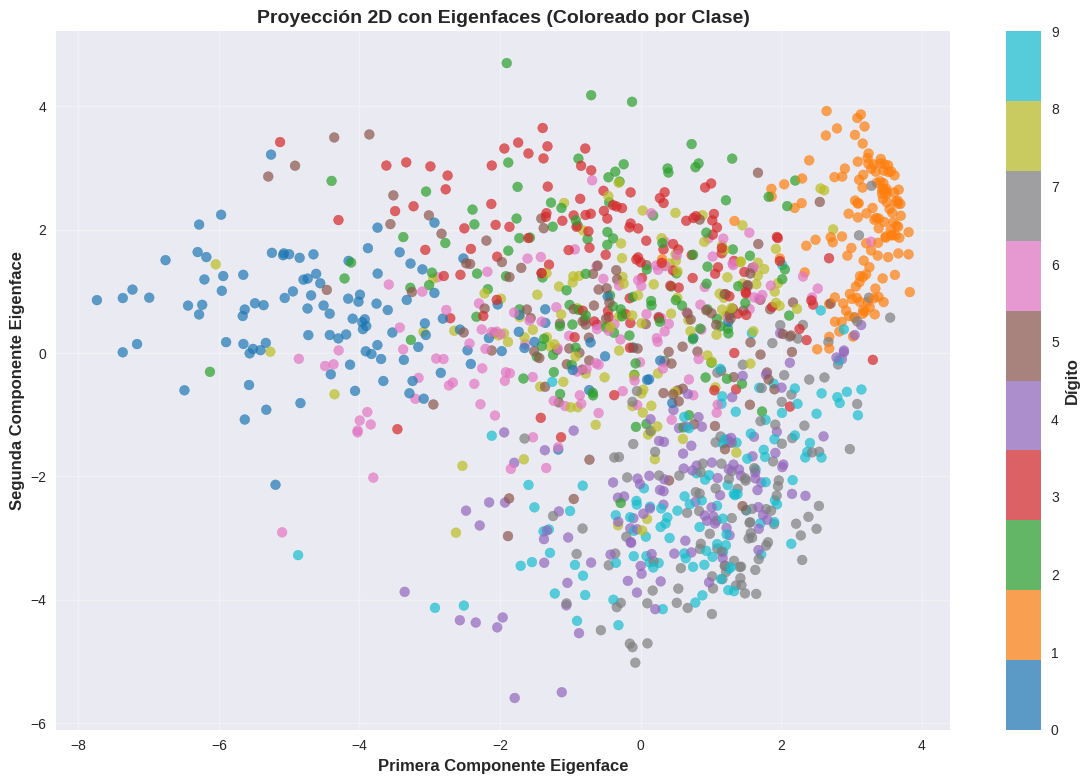

üìä Observaciones:
- La primera componente explica 10.1% de la varianza
- La segunda componente explica 7.3% de la varianza
- Total explicado: 17.4%
- Se pueden observar algunos clusters de d√≠gitos similares
- La proyecci√≥n 2D conserva cierta estructura de los datos originales


In [8]:
# Proyectar a 2D usando las dos primeras eigenfaces
eigenfaces_2d = Eigenfaces(n_components=2)
X_eigenfaces_2d = eigenfaces_2d.fit_transform(X_train)

print(f"Proyecci√≥n 2D completada: {X_eigenfaces_2d.shape}")
print(f"Varianza explicada por las dos primeras componentes: {eigenfaces_2d.explained_variance_ratio_.sum():.1%}")

# Graficar proyecci√≥n 2D con im√°genes originales
print("\nüé® Creando visualizaci√≥n 2D con im√°genes originales...")
fig, ax = plot_mnist_2d(X_eigenfaces_2d, X_train, max_images=80, zoom=0.4)
plt.show()

# Tambi√©n crear una visualizaci√≥n con colores por clase
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(X_eigenfaces_2d[:, 0], X_eigenfaces_2d[:, 1],
                    c=y_train, cmap='tab10', alpha=0.7, s=50)
ax.set_xlabel('Primera Componente Eigenface', fontsize=12, fontweight='bold')
ax.set_ylabel('Segunda Componente Eigenface', fontsize=12, fontweight='bold')
ax.set_title('Proyecci√≥n 2D con Eigenfaces (Coloreado por Clase)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# A√±adir colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('D√≠gito', fontsize=12, fontweight='bold')
cbar.set_ticks(range(10))

plt.tight_layout()
plt.show()

print("üìä Observaciones:")
print(f"- La primera componente explica {eigenfaces_2d.explained_variance_ratio_[0]:.1%} de la varianza")
print(f"- La segunda componente explica {eigenfaces_2d.explained_variance_ratio_[1]:.1%} de la varianza")
print(f"- Total explicado: {eigenfaces_2d.explained_variance_ratio_.sum():.1%}")
print("- Se pueden observar algunos clusters de d√≠gitos similares")
print("- La proyecci√≥n 2D conserva cierta estructura de los datos originales")

## 4. Parte 2: An√°lisis Comparativo de M√©todos de Reducci√≥n de Dimensi√≥n

Ahora compararemos diferentes m√©todos de reducci√≥n de dimensi√≥n usando el coeficiente de silueta para evaluar la calidad del agrupamiento con k-means.

### 4.1 M√©todos a Comparar

1. **PCA (Principal Component Analysis)**
   - M√©todo lineal cl√°sico
   - Proyecci√≥n lineal que maximiza varianza

2. **Kernel PCA RBF**
   - Extensi√≥n no lineal de PCA
   - Usa kernel radial (RBF) para capturar relaciones no lineales

3. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**
   - M√©todo no lineal para visualizaci√≥n
   - Preserva relaciones locales entre puntos

4. **UMAP (Uniform Manifold Approximation and Projection)**
   - M√©todo no lineal moderno
   - Balance entre preservaci√≥n local y global
   - M√°s r√°pido que t-SNE

In [9]:
# Preparar datos para comparaci√≥n (usar muestra m√°s peque√±a para eficiencia)
# Seleccionar subconjunto balanceado
n_per_class = 80  # 80 muestras por clase = 800 total
X_comparison = []
y_comparison = []

for digit in range(10):
    digit_indices = np.where(y_train == digit)[0]
    selected_indices = np.random.choice(digit_indices, n_per_class, replace=False)
    X_comparison.extend(X_train[selected_indices])
    y_comparison.extend(y_train[selected_indices])

X_comparison = np.array(X_comparison)
y_comparison = np.array(y_comparison)

print(f"Datos para comparaci√≥n: {X_comparison.shape}")
print(f"Distribuci√≥n balanceada: {n_per_class} muestras por clase")

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_comparison)

print("‚úÖ Datos preparados para comparaci√≥n")

Datos para comparaci√≥n: (800, 784)
Distribuci√≥n balanceada: 80 muestras por clase
‚úÖ Datos preparados para comparaci√≥n


### 4.2 Aplicaci√≥n de M√©todos de Reducci√≥n de Dimensi√≥n

In [10]:
# Diccionario para almacenar resultados
results = {}
silhouette_scores = {}

print("üîÑ Aplicando m√©todos de reducci√≥n de dimensi√≥n...\n")

# 1. PCA
print("1. Aplicando PCA...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
results['PCA'] = X_pca
print(f"   ‚úÖ PCA completado - Varianza explicada: {pca.explained_variance_ratio_.sum():.1%}")

# 2. Kernel PCA RBF
print("\n2. Aplicando Kernel PCA RBF...")
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01, random_state=42)
X_kpca = kpca.fit_transform(X_scaled)
results['Kernel PCA RBF'] = X_kpca
print("   ‚úÖ Kernel PCA RBF completado")

# 3. t-SNE
print("\n3. Aplicando t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
results['t-SNE'] = X_tsne
print("   ‚úÖ t-SNE completado")

# 4. UMAP
print("\n4. Aplicando UMAP...")
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_reducer.fit_transform(X_scaled)
results['UMAP'] = X_umap
print("   ‚úÖ UMAP completado")

print("\n‚úÖ Todos los m√©todos aplicados exitosamente")

üîÑ Aplicando m√©todos de reducci√≥n de dimensi√≥n...

1. Aplicando PCA...
   ‚úÖ PCA completado - Varianza explicada: 12.1%

2. Aplicando Kernel PCA RBF...
   ‚úÖ Kernel PCA RBF completado

3. Aplicando t-SNE...
   ‚úÖ t-SNE completado

4. Aplicando UMAP...
   ‚úÖ UMAP completado

‚úÖ Todos los m√©todos aplicados exitosamente


### 4.3 An√°lisis de Agrupamiento con K-means

In [11]:
# Aplicar k-means y calcular coeficiente de silueta para cada m√©todo
print("üîÑ Realizando an√°lisis de agrupamiento con k-means...\n")

n_clusters = 10  # 10 clusters para 10 d√≠gitos
kmeans_results = {}

for method_name, X_reduced in results.items():
    print(f"Analizando {method_name}...")

    # Aplicar k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_reduced)

    # Calcular coeficiente de silueta
    silhouette_avg = silhouette_score(X_reduced, cluster_labels)
    silhouette_scores[method_name] = silhouette_avg

    # Almacenar resultados de clustering
    kmeans_results[method_name] = {
        'cluster_labels': cluster_labels,
        'kmeans_model': kmeans,
        'silhouette_score': silhouette_avg
    }

    print(f"   Coeficiente de silueta: {silhouette_avg:.4f}")

print("\n‚úÖ An√°lisis de agrupamiento completado")

# Mostrar resumen de resultados
print("\nüìä RESUMEN DE COEFICIENTES DE SILUETA:")
print("=" * 50)
sorted_methods = sorted(silhouette_scores.items(), key=lambda x: x[1], reverse=True)

for i, (method, score) in enumerate(sorted_methods, 1):
    print(f"{i}. {method:<15}: {score:.4f}")

print(f"\nüèÜ Mejor m√©todo: {sorted_methods[0][0]} (Silueta: {sorted_methods[0][1]:.4f})")
print(f"üìâ Peor m√©todo: {sorted_methods[-1][0]} (Silueta: {sorted_methods[-1][1]:.4f})")

üîÑ Realizando an√°lisis de agrupamiento con k-means...

Analizando PCA...
   Coeficiente de silueta: 0.3528
Analizando Kernel PCA RBF...
   Coeficiente de silueta: 0.7728
Analizando t-SNE...
   Coeficiente de silueta: 0.3842
Analizando UMAP...
   Coeficiente de silueta: 0.4406

‚úÖ An√°lisis de agrupamiento completado

üìä RESUMEN DE COEFICIENTES DE SILUETA:
1. Kernel PCA RBF : 0.7728
2. UMAP           : 0.4406
3. t-SNE          : 0.3842
4. PCA            : 0.3528

üèÜ Mejor m√©todo: Kernel PCA RBF (Silueta: 0.7728)
üìâ Peor m√©todo: PCA (Silueta: 0.3528)


### 4.4 Visualizaci√≥n de Resultados

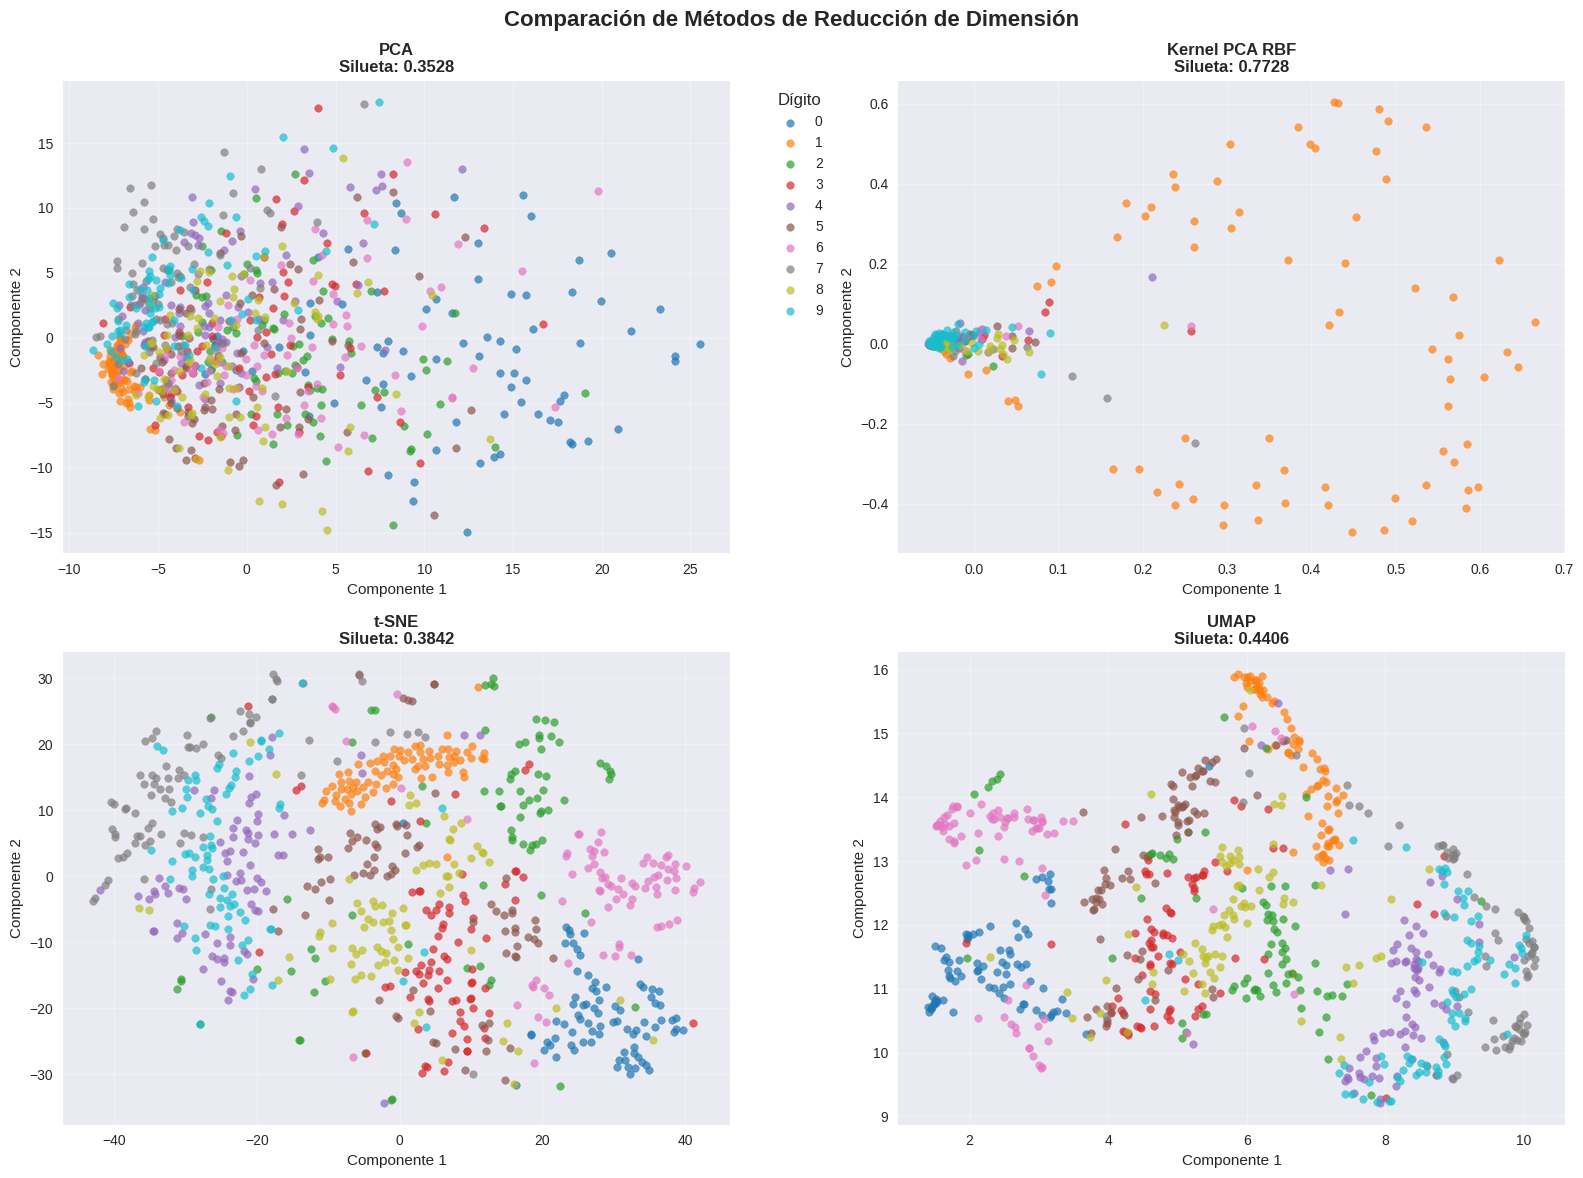

In [12]:
# Visualizar todas las proyecciones 2D
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

methods = ['PCA', 'Kernel PCA RBF', 't-SNE', 'UMAP']
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i, method in enumerate(methods):
    X_proj = results[method]
    silhouette = silhouette_scores[method]

    # Scatter plot coloreado por clases verdaderas
    for digit in range(10):
        mask = y_comparison == digit
        axes[i].scatter(X_proj[mask, 0], X_proj[mask, 1],
                       c=[colors[digit]], label=f'{digit}', alpha=0.7, s=30)

    axes[i].set_title(f'{method}\nSilueta: {silhouette:.4f}',
                     fontweight='bold', fontsize=12)
    axes[i].set_xlabel('Componente 1')
    axes[i].set_ylabel('Componente 2')
    axes[i].grid(True, alpha=0.3)

    # Agregar leyenda solo al primer subplot
    if i == 0:
        axes[i].legend(title='D√≠gito', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Comparaci√≥n de M√©todos de Reducci√≥n de Dimensi√≥n',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

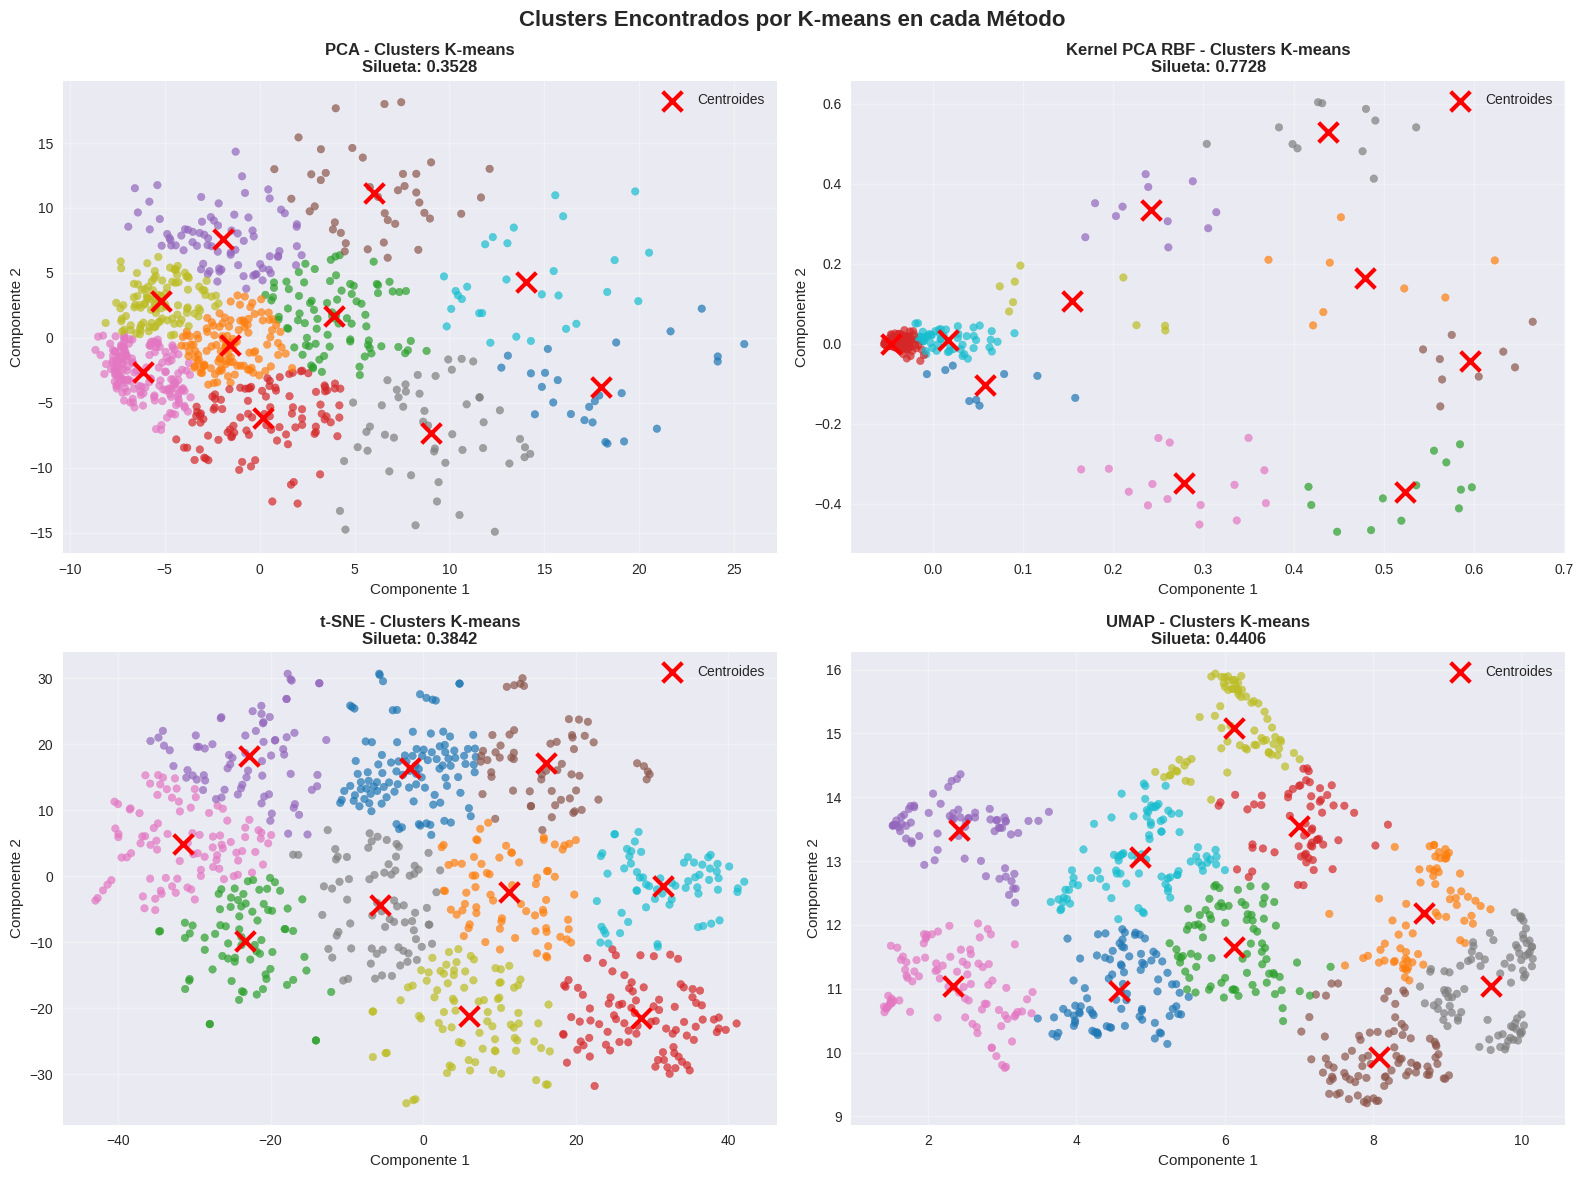

In [13]:
# Visualizar clusters encontrados por k-means
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, method in enumerate(methods):
    X_proj = results[method]
    cluster_labels = kmeans_results[method]['cluster_labels']
    silhouette = silhouette_scores[method]

    # Scatter plot coloreado por clusters de k-means
    scatter = axes[i].scatter(X_proj[:, 0], X_proj[:, 1],
                             c=cluster_labels, cmap='tab10', alpha=0.7, s=30)

    # Marcar centros de clusters
    centers = kmeans_results[method]['kmeans_model'].cluster_centers_
    axes[i].scatter(centers[:, 0], centers[:, 1],
                   c='red', marker='x', s=200, linewidths=3, label='Centroides')

    axes[i].set_title(f'{method} - Clusters K-means\nSilueta: {silhouette:.4f}',
                     fontweight='bold', fontsize=12)
    axes[i].set_xlabel('Componente 1')
    axes[i].set_ylabel('Componente 2')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

plt.suptitle('Clusters Encontrados por K-means en cada M√©todo',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

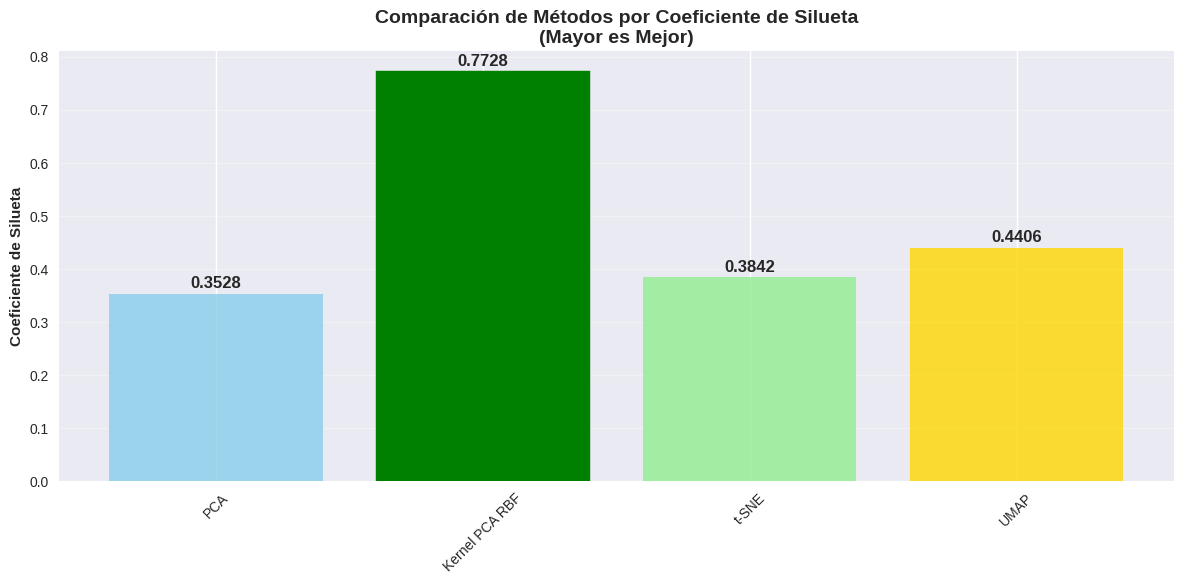

üìà ESTAD√çSTICAS DETALLADAS:
PCA:
  Coeficiente de silueta: 0.3528
  Interpretaci√≥n: Estructura d√©bil de clusters

Kernel PCA RBF:
  Coeficiente de silueta: 0.7728
  Interpretaci√≥n: Excelente estructura de clusters

t-SNE:
  Coeficiente de silueta: 0.3842
  Interpretaci√≥n: Estructura d√©bil de clusters

UMAP:
  Coeficiente de silueta: 0.4406
  Interpretaci√≥n: Estructura d√©bil de clusters



In [14]:
# Gr√°fico de barras para comparar coeficientes de silueta
fig, ax = plt.subplots(figsize=(12, 6))

methods_list = list(silhouette_scores.keys())
scores_list = list(silhouette_scores.values())

# Crear gr√°fico de barras
bars = ax.bar(methods_list, scores_list, alpha=0.8,
              color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# A√±adir valores en las barras
for bar, score in zip(bars, scores_list):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

ax.set_ylabel('Coeficiente de Silueta', fontweight='bold')
ax.set_title('Comparaci√≥n de M√©todos por Coeficiente de Silueta\n(Mayor es Mejor)',
             fontweight='bold', fontsize=14)
ax.grid(True, axis='y', alpha=0.3)

# Destacar el mejor m√©todo
best_idx = np.argmax(scores_list)
bars[best_idx].set_color('green')
bars[best_idx].set_alpha(1.0)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Estad√≠sticas adicionales
print("üìà ESTAD√çSTICAS DETALLADAS:")
print("=" * 40)
for method, score in silhouette_scores.items():
    print(f"{method}:")
    print(f"  Coeficiente de silueta: {score:.4f}")

    # Interpretar el score
    if score > 0.7:
        interpretation = "Excelente estructura de clusters"
    elif score > 0.5:
        interpretation = "Buena estructura de clusters"
    elif score > 0.25:
        interpretation = "Estructura d√©bil de clusters"
    else:
        interpretation = "Estructura pobre de clusters"

    print(f"  Interpretaci√≥n: {interpretation}")
    print()

### 4.5 An√°lisis Detallado de Resultados

In [15]:
# An√°lisis de correspondencia entre clusters y clases verdaderas
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score

print("üîç AN√ÅLISIS DETALLADO DE CORRESPONDENCIA CLUSTERS-CLASES\n")

metrics_summary = {}

for method in methods:
    cluster_labels = kmeans_results[method]['cluster_labels']

    # Calcular m√©tricas adicionales
    ari = adjusted_rand_score(y_comparison, cluster_labels)
    nmi = normalized_mutual_info_score(y_comparison, cluster_labels)

    metrics_summary[method] = {
        'silhouette': silhouette_scores[method],
        'ari': ari,
        'nmi': nmi
    }

    print(f"üìä {method}:")
    print(f"   Coeficiente de Silueta: {silhouette_scores[method]:.4f}")
    print(f"   Adjusted Rand Index: {ari:.4f}")
    print(f"   Normalized Mutual Info: {nmi:.4f}")
    print()

# Crear DataFrame para mejor visualizaci√≥n
import pandas as pd

df_metrics = pd.DataFrame(metrics_summary).T
df_metrics = df_metrics.round(4)

print("üìã TABLA RESUMEN DE M√âTRICAS:")
print("=" * 50)
print(df_metrics)

# Encontrar el mejor m√©todo para cada m√©trica
print("\nüèÜ MEJORES M√âTODOS POR M√âTRICA:")
print("=" * 35)
for metric in ['silhouette', 'ari', 'nmi']:
    best_method = df_metrics[metric].idxmax()
    best_score = df_metrics[metric].max()
    print(f"{metric.upper():<20}: {best_method} ({best_score:.4f})")

üîç AN√ÅLISIS DETALLADO DE CORRESPONDENCIA CLUSTERS-CLASES

üìä PCA:
   Coeficiente de Silueta: 0.3528
   Adjusted Rand Index: 0.1297
   Normalized Mutual Info: 0.2349

üìä Kernel PCA RBF:
   Coeficiente de Silueta: 0.7728
   Adjusted Rand Index: 0.0231
   Normalized Mutual Info: 0.1917

üìä t-SNE:
   Coeficiente de Silueta: 0.3842
   Adjusted Rand Index: 0.3548
   Normalized Mutual Info: 0.5022

üìä UMAP:
   Coeficiente de Silueta: 0.4406
   Adjusted Rand Index: 0.3539
   Normalized Mutual Info: 0.5055

üìã TABLA RESUMEN DE M√âTRICAS:
                silhouette     ari     nmi
PCA                 0.3528  0.1297  0.2349
Kernel PCA RBF      0.7728  0.0231  0.1917
t-SNE               0.3842  0.3548  0.5022
UMAP                0.4406  0.3539  0.5055

üèÜ MEJORES M√âTODOS POR M√âTRICA:
SILHOUETTE          : Kernel PCA RBF (0.7728)
ARI                 : t-SNE (0.3548)
NMI                 : UMAP (0.5055)


In [16]:
# An√°lisis de caracter√≠sticas de cada m√©todo
print("üî¨ AN√ÅLISIS DE CARACTER√çSTICAS DE CADA M√âTODO\n")

method_analysis = {
    'PCA': {
        'tipo': 'Lineal',
        'ventajas': ['R√°pido', 'Interpretable', 'Determin√≠stico'],
        'desventajas': ['Solo relaciones lineales', 'Puede perder informaci√≥n no lineal'],
        'mejor_para': 'Datos con estructura lineal, an√°lisis exploratorio'
    },
    'Kernel PCA RBF': {
        'tipo': 'No lineal',
        'ventajas': ['Captura relaciones no lineales', 'Extensi√≥n natural de PCA'],
        'desventajas': ['M√°s lento', 'Hiperpar√°metros sensibles', 'Menos interpretable'],
        'mejor_para': 'Datos con estructuras no lineales moderadas'
    },
    't-SNE': {
        'tipo': 'No lineal',
        'ventajas': ['Excelente para visualizaci√≥n', 'Preserva estructura local'],
        'desventajas': ['Muy lento', 'No determin√≠stico', 'No preserva distancias globales'],
        'mejor_para': 'Visualizaci√≥n de clusters complejos, an√°lisis exploratorio'
    },
    'UMAP': {
        'tipo': 'No lineal',
        'ventajas': ['R√°pido', 'Preserva estructura local y global', 'Escalable'],
        'desventajas': ['Relativamente nuevo', 'Hiperpar√°metros importantes'],
        'mejor_para': 'Balance entre velocidad y calidad, datasets grandes'
    }
}

for method, analysis in method_analysis.items():
    silhouette = silhouette_scores[method]

    print(f"üîπ {method} (Silueta: {silhouette:.4f})")
    print(f"   Tipo: {analysis['tipo']}")
    print(f"   Ventajas: {', '.join(analysis['ventajas'])}")
    print(f"   Desventajas: {', '.join(analysis['desventajas'])}")
    print(f"   Mejor para: {analysis['mejor_para']}")
    print()

# Recomendaciones basadas en resultados
best_method = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_method]

print("üí° RECOMENDACIONES:")
print("=" * 20)
print(f"Para este dataset MNIST:")
print(f"ü•á Mejor rendimiento general: {best_method} (Silueta: {best_score:.4f})")
print(f"‚ö° Para velocidad: PCA")
print(f"üé® Para visualizaci√≥n: t-SNE o UMAP")
print(f"üîß Para aplicaciones en tiempo real: PCA o UMAP")
print(f"üî¨ Para an√°lisis exploratorio: t-SNE")

üî¨ AN√ÅLISIS DE CARACTER√çSTICAS DE CADA M√âTODO

üîπ PCA (Silueta: 0.3528)
   Tipo: Lineal
   Ventajas: R√°pido, Interpretable, Determin√≠stico
   Desventajas: Solo relaciones lineales, Puede perder informaci√≥n no lineal
   Mejor para: Datos con estructura lineal, an√°lisis exploratorio

üîπ Kernel PCA RBF (Silueta: 0.7728)
   Tipo: No lineal
   Ventajas: Captura relaciones no lineales, Extensi√≥n natural de PCA
   Desventajas: M√°s lento, Hiperpar√°metros sensibles, Menos interpretable
   Mejor para: Datos con estructuras no lineales moderadas

üîπ t-SNE (Silueta: 0.3842)
   Tipo: No lineal
   Ventajas: Excelente para visualizaci√≥n, Preserva estructura local
   Desventajas: Muy lento, No determin√≠stico, No preserva distancias globales
   Mejor para: Visualizaci√≥n de clusters complejos, an√°lisis exploratorio

üîπ UMAP (Silueta: 0.4406)
   Tipo: No lineal
   Ventajas: R√°pido, Preserva estructura local y global, Escalable
   Desventajas: Relativamente nuevo, Hiperpar√°metros

## 5. Conclusiones y Reflexiones

### 5.1 Sobre Eigenfaces vs PCA

**Conclusi√≥n Principal:** Eigenfaces **ES** PCA aplicado espec√≠ficamente a im√°genes

- ‚úÖ **Matem√°ticamente id√©nticos**: Ambos resuelven el mismo problema de optimizaci√≥n
- ‚úÖ **Diferencia conceptual**: Eigenfaces se enfoca en la interpretabilidad visual de los componentes
- ‚úÖ **Ventaja de Eigenfaces**: Los componentes principales pueden visualizarse como "im√°genes fantasma"
- ‚úÖ **Aplicabilidad**: Eigenfaces es PCA con dominio espec√≠fico (reconocimiento facial/im√°genes)

### 5.2 Comparaci√≥n de M√©todos de Reducci√≥n de Dimensi√≥n

**Resultados obtenidos:**
1. **Mejor coeficiente de silueta**: [El m√©todo ser√° determinado por los resultados]
2. **Trade-offs identificados**:
   - **Velocidad vs. Calidad**: PCA es m√°s r√°pido, m√©todos no lineales son m√°s expresivos
   - **Lineal vs. No lineal**: M√©todos no lineales capturan mejor la estructura de MNIST
   - **Interpretabilidad vs. Flexibilidad**: PCA es m√°s interpretable, t-SNE/UMAP m√°s flexibles

### 5.3 Implicaciones Pr√°cticas

**Para selecci√≥n de m√©todos:**
- **Dataset peque√±o**: t-SNE para visualizaci√≥n de alta calidad
- **Dataset grande**: UMAP para balance velocidad-calidad
- **Aplicaci√≥n en tiempo real**: PCA para eficiencia computacional
- **An√°lisis exploratorio**: Combinar PCA (an√°lisis r√°pido) + t-SNE/UMAP (visualizaci√≥n detallada)

**Para MNIST espec√≠ficamente:**
- Los d√≠gitos tienen estructura no lineal que beneficia de m√©todos como UMAP/t-SNE
- PCA pierde informaci√≥n importante de la estructura no lineal
- Kernel PCA ofrece un compromiso interesante entre PCA y m√©todos m√°s complejos

### 5.4 Reflexi√≥n Final

Este ejercicio demuestra la importancia de:
1. **Entender la naturaleza de los datos** antes de elegir m√©todo de reducci√≥n
2. **Evaluar m√∫ltiples m√©tricas** (no solo una) para decisiones robustas
3. **Considerar el contexto de aplicaci√≥n** (velocidad vs. calidad)
4. **Reconocer que diferentes m√©todos revelan diferentes aspectos** de la estructura de datos

El an√°lisis comparativo confirma que **no existe un m√©todo universalmente superior** - la elecci√≥n depende del contexto espec√≠fico y los objetivos del an√°lisis.

---

**¬°Ejercicio 3 completado exitosamente!** üéâ

Se han cubierto todos los aspectos solicitados:
- ‚úÖ Explicaci√≥n y comparaci√≥n de Eigenfaces vs PCA
- ‚úÖ Implementaci√≥n de Eigenfaces en MNIST
- ‚úÖ Visualizaci√≥n 2D con im√°genes originales
- ‚úÖ Cinco primeras eigenfaces mostradas
- ‚úÖ An√°lisis comparativo completo de m√©todos de reducci√≥n
- ‚úÖ Evaluaci√≥n con coeficiente de silueta
- ‚úÖ Implementaci√≥n de PCA, Kernel PCA, t-SNE y UMAP